In [ ]:
import pandas as pd

df = pd.read_csv('/content/freshdata_clean.csv')

In [ ]:
display(df.head())

,serial,issue date,rp state plate,body style,location,route,violation code,violation description,fine amount
0,1,2015-12-21,CA,PA,13147 WELBY WAY,1521,4000A1,NO EVIDENCE OF REG,50
1,2,2015-12-21,CA,VN,525 S MAIN ST,1C51,4000A1,NO EVIDENCE OF REG,50
2,3,2015-12-21,CA,PA,200 WORLD WAY,2R2,8939,WHITE CURB,58
3,5,2015-09-15,CA,PA,GEORGIA ST/OLYMPIC,1FB70,8069A,NO STOPPING/STANDING,93
4,6,2015-09-15,CA,VN,SAN PEDRO S/O BOYD,1A35W,4000A1,NO EVIDENCE OF REG,50


In [ ]:
df.describe()

,serial,fine amount
count,1.037080e+06,1.037080e+06
mean,5.245393e+05,6.985640e+01
std,3.029161e+05,3.199114e+01
min,1.000000e+00,1.000000e+01
25%,2.614858e+05,6.300000e+01
50%,5.267505e+05,6.800000e+01
75%,7.860582e+05,7.300000e+01
max,1.048575e+06,5.050000e+02


In [ ]:
df.columns

Index(['serial', 'issue date', 'rp state plate', 'body style', 'location',
       'route', 'violation code', 'violation description', 'fine amount'],
      dtype='object')

In [ ]:
display(df.head())

,serial,issue date,rp state plate,body style,location,route,violation code,violation description,fine amount
0,1,2015-12-21,CA,PA,13147 WELBY WAY,1521,4000A1,NO EVIDENCE OF REG,50
1,2,2015-12-21,CA,VN,525 S MAIN ST,1C51,4000A1,NO EVIDENCE OF REG,50
2,3,2015-12-21,CA,PA,200 WORLD WAY,2R2,8939,WHITE CURB,58
3,5,2015-09-15,CA,PA,GEORGIA ST/OLYMPIC,1FB70,8069A,NO STOPPING/STANDING,93
4,6,2015-09-15,CA,VN,SAN PEDRO S/O BOYD,1A35W,4000A1,NO EVIDENCE OF REG,50


In [ ]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (1037080, 9)


In [ ]:
df.isna().sum()

,0
serial,0
issue date,0
rp state plate,0
body style,0
location,0
route,0
violation code,0
violation description,0
fine amount,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037080 entries, 0 to 1037079
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   serial                 1037080 non-null  int64 
 1   issue date             1037080 non-null  object
 2   rp state plate         1037080 non-null  object
 3   body style             1037080 non-null  object
 4   location               1037080 non-null  object
 5   route                  1037080 non-null  object
 6   violation code         1037080 non-null  object
 7   violation description  1037080 non-null  object
 8   fine amount            1037080 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 71.2+ MB


Column descriptions

In [ ]:
col_desc = {
    "serial": "Ticket serial number (unique id for this ticket in this dataset).",
    "issue date": "Calendar day the officer issued the ticket (YYYY-MM-DD).",
    "rp state plate": "Registration state from the plate (e.g., CA, FL).",
    "body style": "Vehicle type code (e.g., PA=Passenger Auto, VN=Van, TR=Truck, SU=SUV, MC=Motorcycle).",
    "location": "Street address or intersection where the citation was written.",
    "route": "Enforcement/beat or street-sweeping route code for the patrol area.",
    "violation code": "Legal/municipal code section for the offense (e.g., 4000A1). Determines the standard fine.",
    "violation description": "Plain-English description matching the violation code (e.g., 'NO EVIDENCE OF REG', 'WHITE CURB').",
    "fine amount": "Base dollar amount of the citation at issue time (before late fees/discounts)."
}

print("Column descriptions:\n")
for col in df.columns:
    if col in col_desc:
        print(f"{col}: {col_desc[col]}")
    else:
        print(f"{col}: (no description in demo)")

Column descriptions:

serial: Ticket serial number (unique id for this ticket in this dataset).
issue date: Calendar day the officer issued the ticket (YYYY-MM-DD).
rp state plate: Registration state from the plate (e.g., CA, FL).
body style: Vehicle type code (e.g., PA=Passenger Auto, VN=Van, TR=Truck, SU=SUV, MC=Motorcycle).
location: Street address or intersection where the citation was written.
route: Enforcement/beat or street-sweeping route code for the patrol area.
violation code: Legal/municipal code section for the offense (e.g., 4000A1). Determines the standard fine.
violation description: Plain-English description matching the violation code (e.g., 'NO EVIDENCE OF REG', 'WHITE CURB').
fine amount: Base dollar amount of the citation at issue time (before late fees/discounts).


In [ ]:
date_columns = [
    'issue date'
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037080 entries, 0 to 1037079
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   serial                 1037080 non-null  int64         
 1   issue date             1037080 non-null  datetime64[ns]
 2   rp state plate         1037080 non-null  object        
 3   body style             1037080 non-null  object        
 4   location               1037080 non-null  object        
 5   route                  1037080 non-null  object        
 6   violation code         1037080 non-null  object        
 7   violation description  1037080 non-null  object        
 8   fine amount            1037080 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 71.2+ MB


In [ ]:

df["issue date"] = pd.to_datetime(df["issue date"], errors="coerce")

df["issue_year"]  = df["issue date"].dt.year
df["issue_month"] = df["issue date"].dt.month
df["issue_dow"]   = df["issue date"].dt.dayofweek
df["is_weekend"]  = df["issue_dow"].isin([5,6]).astype(int)

import numpy as np
df["month_sin"] = np.sin(2*np.pi*((df["issue_month"]-1)/12))
df["month_cos"] = np.cos(2*np.pi*((df["issue_month"]-1)/12))
df["dow_sin"]   = np.sin(2*np.pi*(df["issue_dow"]/7))
df["dow_cos"]   = np.cos(2*np.pi*(df["issue_dow"]/7))


In [ ]:
display(df.head())

,serial,issue date,rp state plate,body style,location,route,violation code,violation description,fine amount,issue_year,issue_month,issue_dow,is_weekend,month_sin,month_cos,dow_sin,dow_cos
0,1,2015-12-21,CA,PA,13147 WELBY WAY,1521,4000A1,NO EVIDENCE OF REG,50,2015,12,0,0,-0.500000,0.866025,0.000000,1.00000
1,2,2015-12-21,CA,VN,525 S MAIN ST,1C51,4000A1,NO EVIDENCE OF REG,50,2015,12,0,0,-0.500000,0.866025,0.000000,1.00000
2,3,2015-12-21,CA,PA,200 WORLD WAY,2R2,8939,WHITE CURB,58,2015,12,0,0,-0.500000,0.866025,0.000000,1.00000
3,5,2015-09-15,CA,PA,GEORGIA ST/OLYMPIC,1FB70,8069A,NO STOPPING/STANDING,93,2015,9,1,0,-0.866025,-0.500000,0.781831,0.62349
4,6,2015-09-15,CA,VN,SAN PEDRO S/O BOYD,1A35W,4000A1,NO EVIDENCE OF REG,50,2015,9,1,0,-0.866025,-0.500000,0.781831,0.62349


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Analysis of Categorical Columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))

Analysis of Categorical Columns:

Column: rp state plate
rp state plate
CA    969371
AZ      8843
TX      6345
NV      5879
FL      4120
       ...  
YU         3
GU         2
PR         1
NF         1
NW         1
Name: count, Length: 74, dtype: int64

Column: body style
body style
PA    910800
PU     35359
VN     28692
TK     27455
CM     16526
       ...  
VC         1
BI         1
RU         1
AM         1
TE         1
Name: count, Length: 65, dtype: int64

Column: location
location
11600 SAN VICENTE BL    1163
1301 ELECTRIC AVE       1016
5901 98TH ST W           757
4867 SUNSET BLVD W       708
101 LARCHMONT BL N       691
                        ... 
16300 VENTANA LANE         1
6800 WILBUR AVE            1
13340 SHERMAN WAY          1
4114 FULTON AVE            1
21541 BLYTHE ST            1
Name: count, Length: 378798, dtype: int64

Column: route
route
600      51191
500      34297
402      27114
403      23742
401      22648
         ...  
14F19        1
EL4          1
1999  

Analysis of Numerical Columns :

Column: fine amount


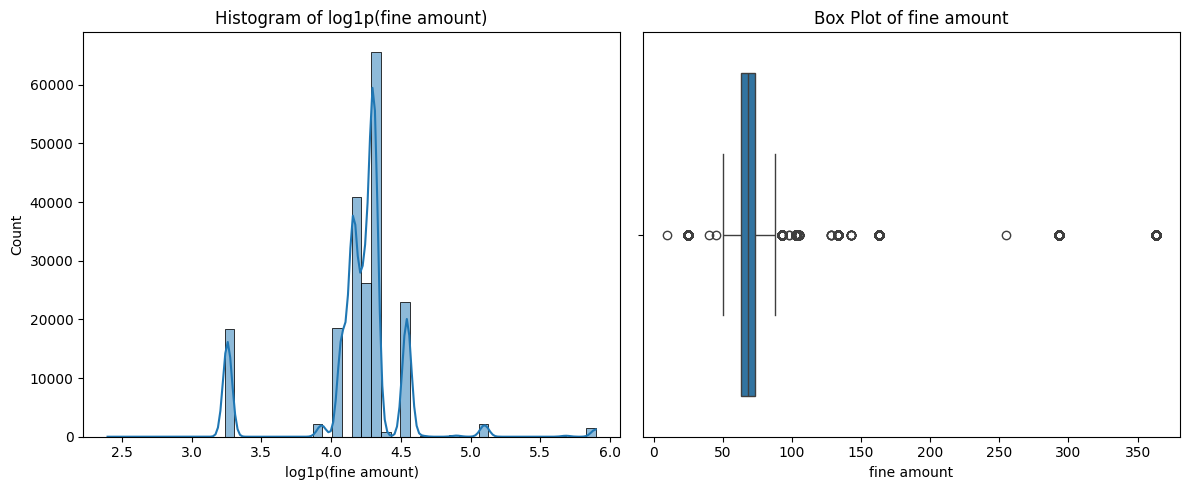


Column: issue_year


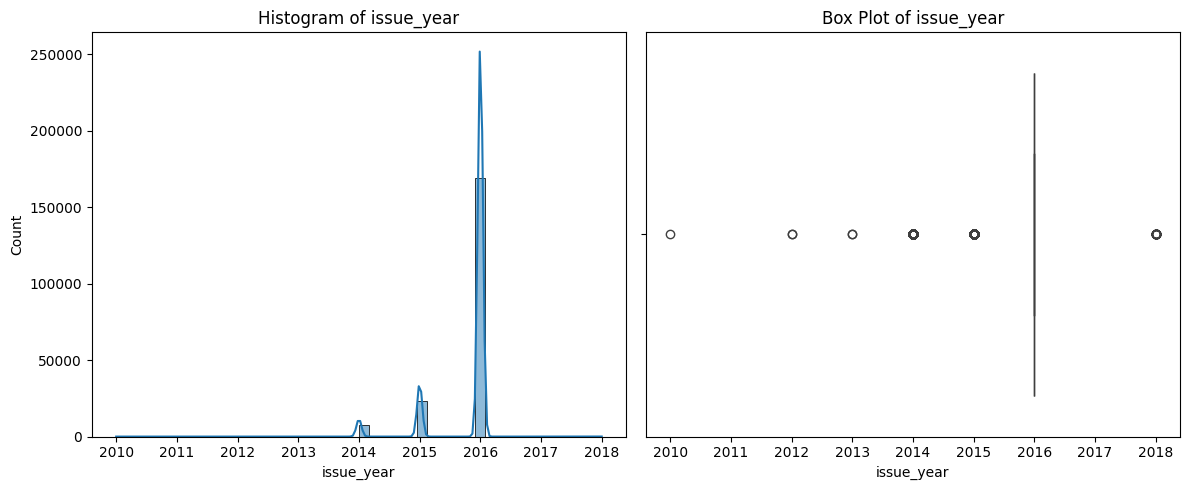


Column: issue_month


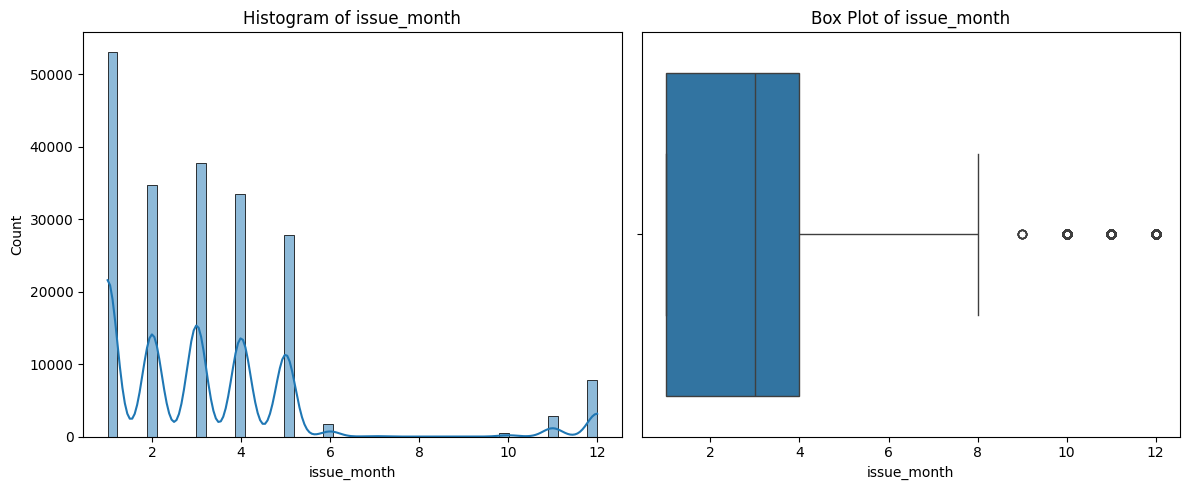


Column: issue_dow


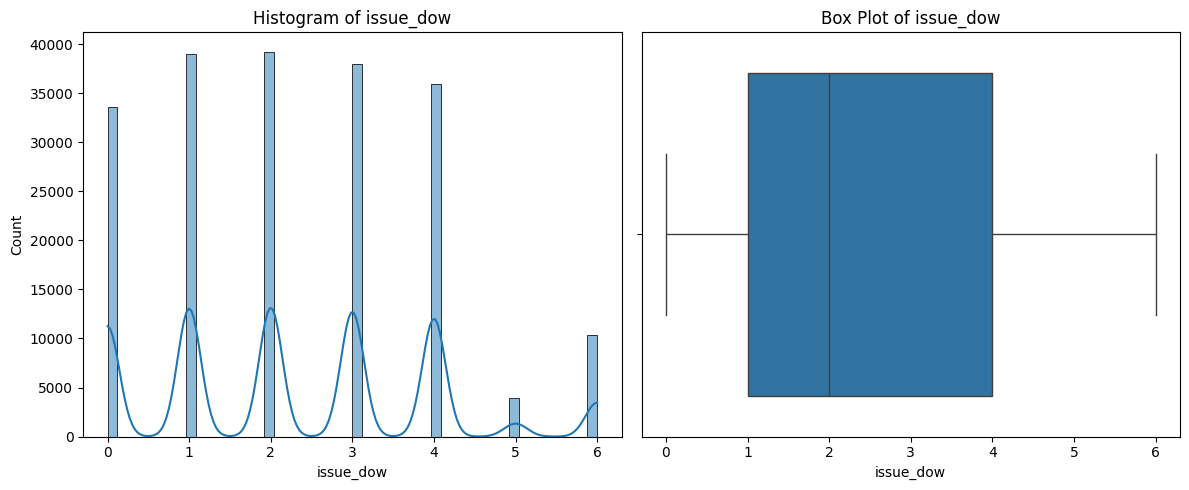


Column: is_weekend


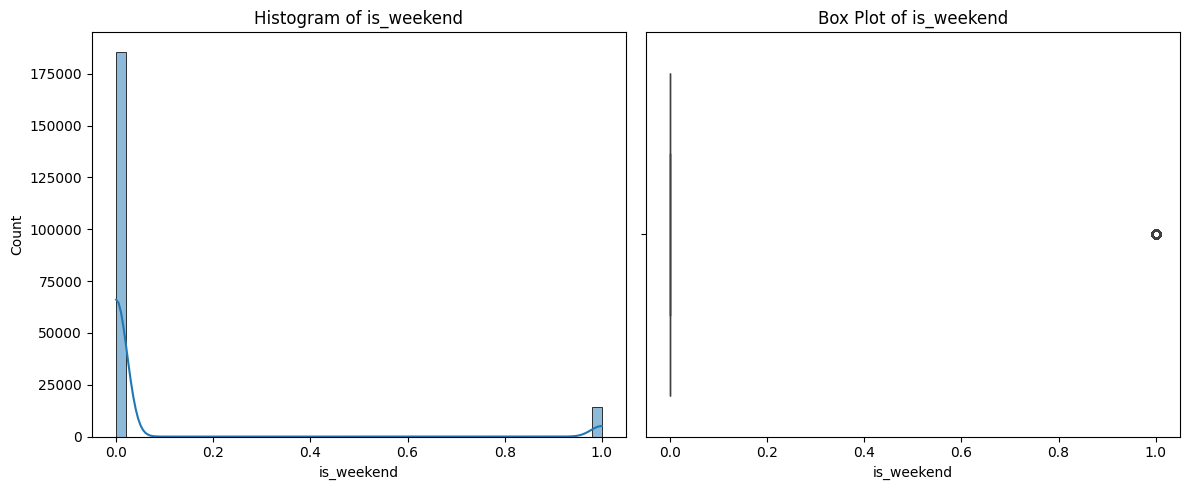


Column: month_sin


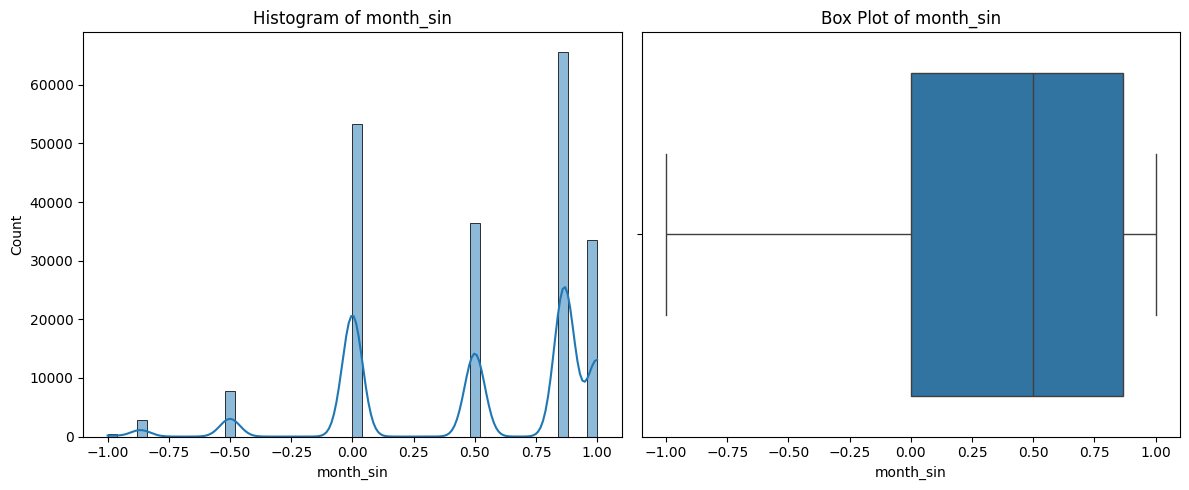


Column: month_cos


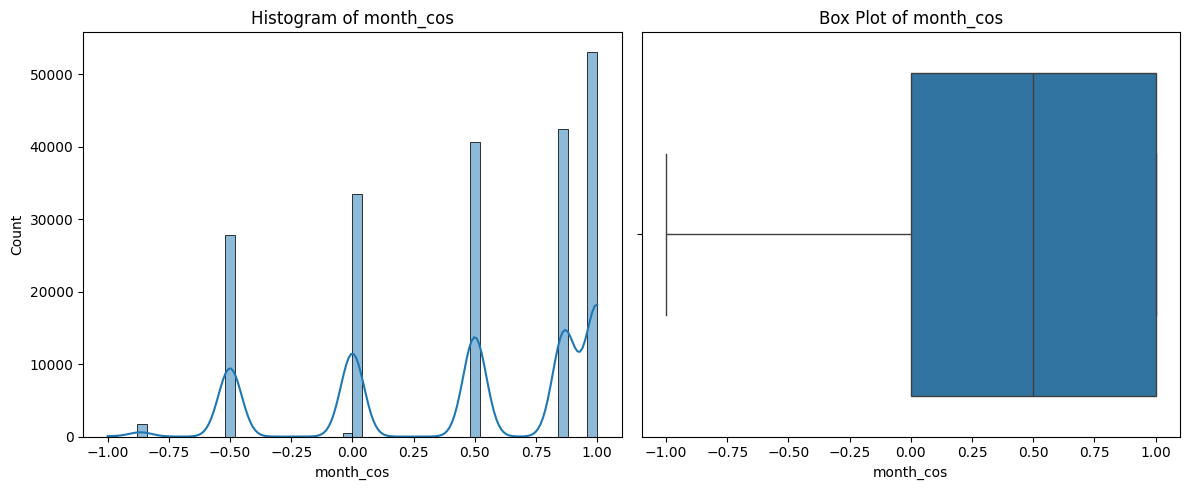


Column: dow_sin


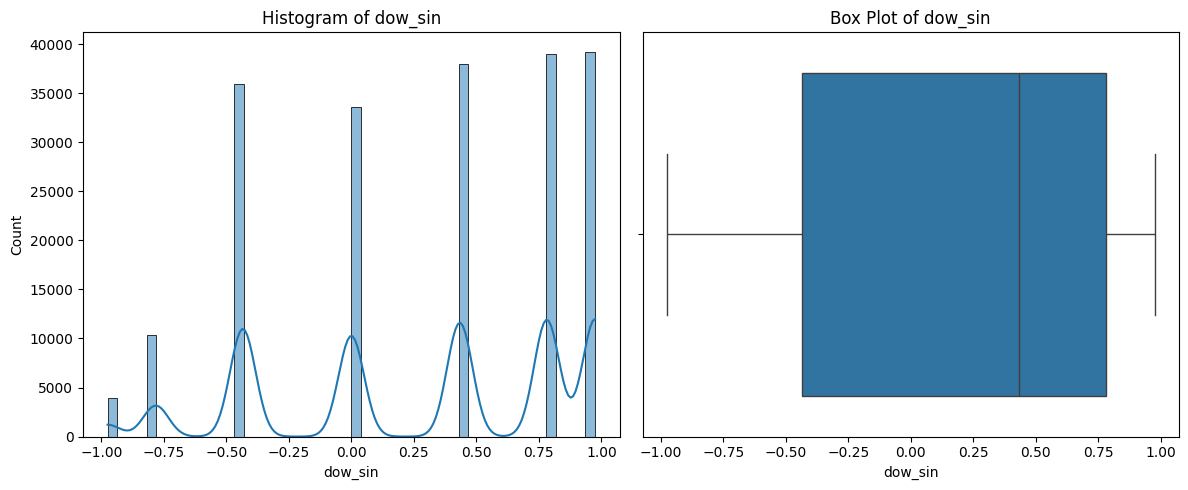


Column: dow_cos


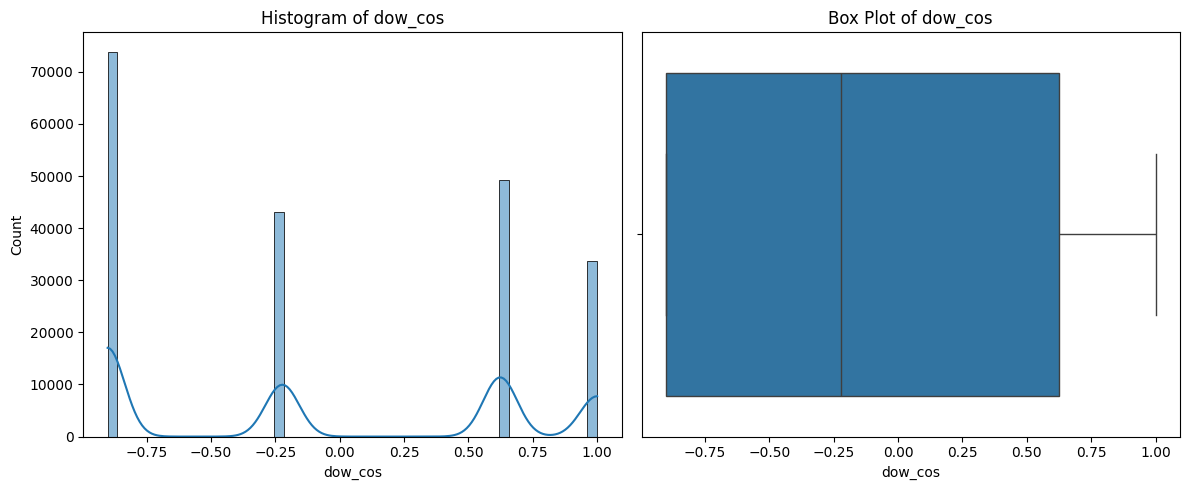

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Analysis of Numerical Columns :")

df_num = df.drop(columns=["serial"], errors="ignore")
numerical_cols = df_num.select_dtypes(include=["number"]).columns.tolist()

plot_df = df_num.copy()
if len(plot_df) > 200_000:
    plot_df = plot_df.sample(200_000, random_state=42)

for col in numerical_cols:
    print(f"\nColumn: {col}")
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    data = plot_df[col].dropna().values
    if col.lower().strip() == "fine amount":
        data = data[data > 0]
        sns.histplot(np.log1p(data), kde=True, bins=50)
        plt.title(f'Histogram of log1p({col})')
        plt.xlabel(f'log1p({col})')
    else:
        sns.histplot(data, kde=True, bins=50)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=plot_df[col].dropna(), orient='h')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


In [ ]:
display(df_num.head())

,issue date,rp state plate,body style,location,route,violation code,violation description,fine amount,issue_year,issue_month,issue_dow,is_weekend,month_sin,month_cos,dow_sin,dow_cos
0,2015-12-21,CA,PA,13147 WELBY WAY,1521,4000A1,NO EVIDENCE OF REG,50,2015,12,0,0,-0.500000,0.866025,0.000000,1.00000
1,2015-12-21,CA,VN,525 S MAIN ST,1C51,4000A1,NO EVIDENCE OF REG,50,2015,12,0,0,-0.500000,0.866025,0.000000,1.00000
2,2015-12-21,CA,PA,200 WORLD WAY,2R2,8939,WHITE CURB,58,2015,12,0,0,-0.500000,0.866025,0.000000,1.00000
3,2015-09-15,CA,PA,GEORGIA ST/OLYMPIC,1FB70,8069A,NO STOPPING/STANDING,93,2015,9,1,0,-0.866025,-0.500000,0.781831,0.62349
4,2015-09-15,CA,VN,SAN PEDRO S/O BOYD,1A35W,4000A1,NO EVIDENCE OF REG,50,2015,9,1,0,-0.866025,-0.500000,0.781831,0.62349


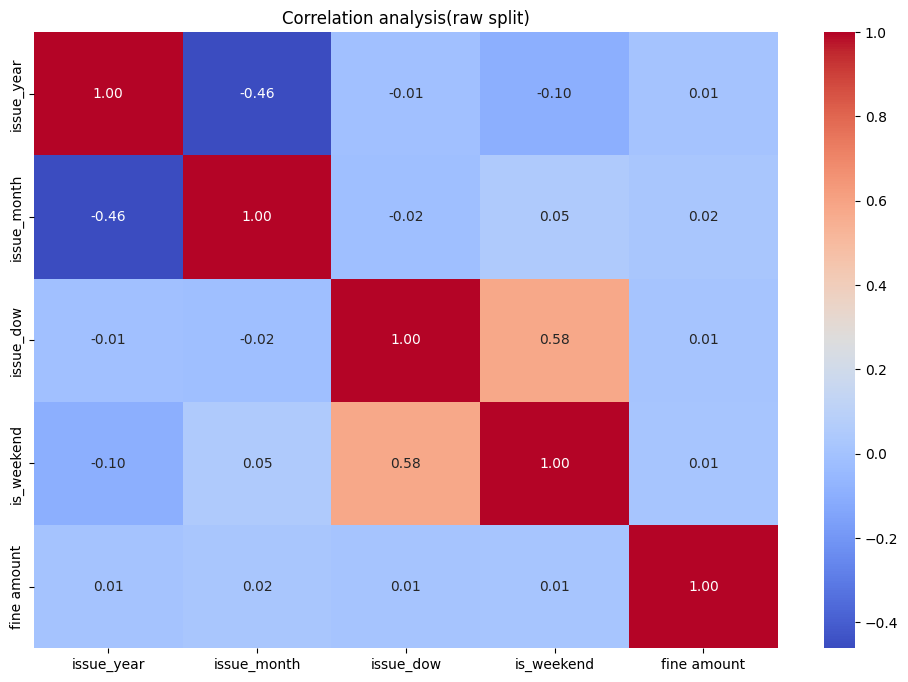

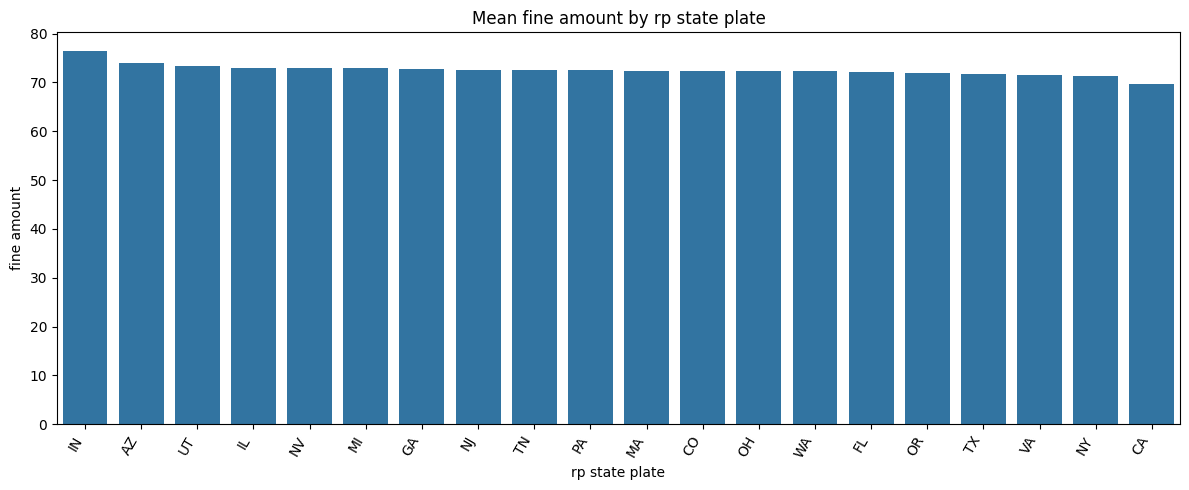

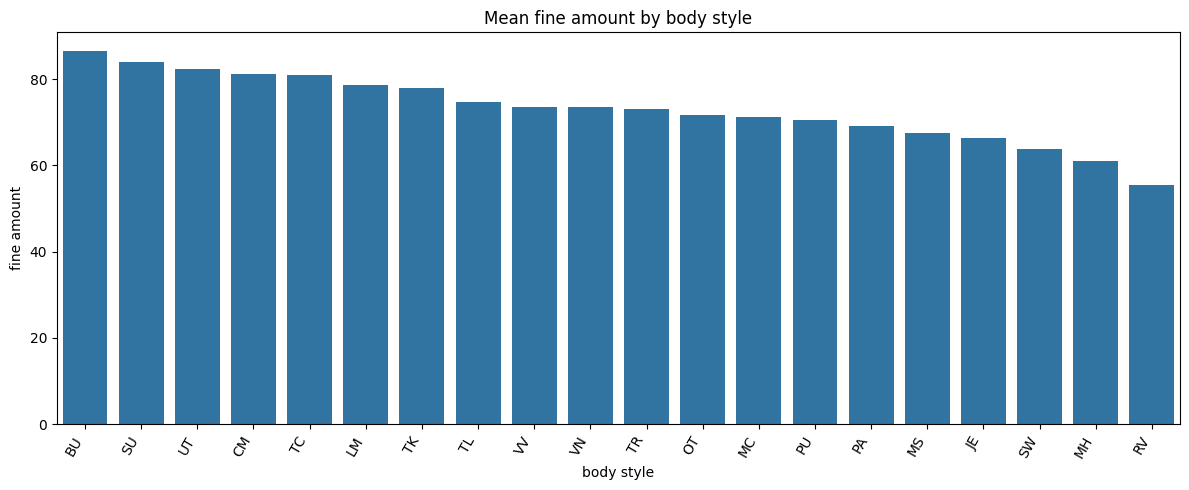

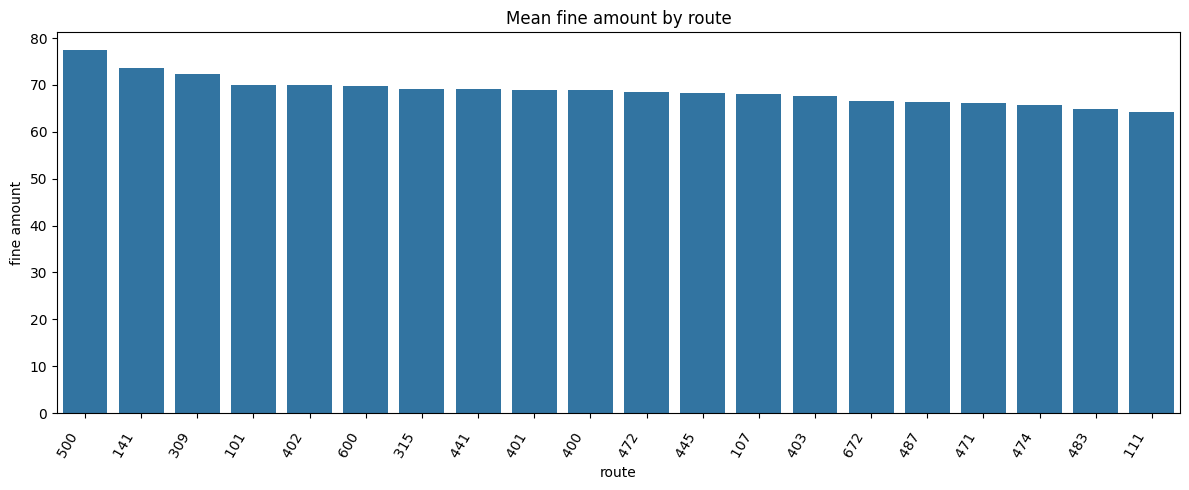

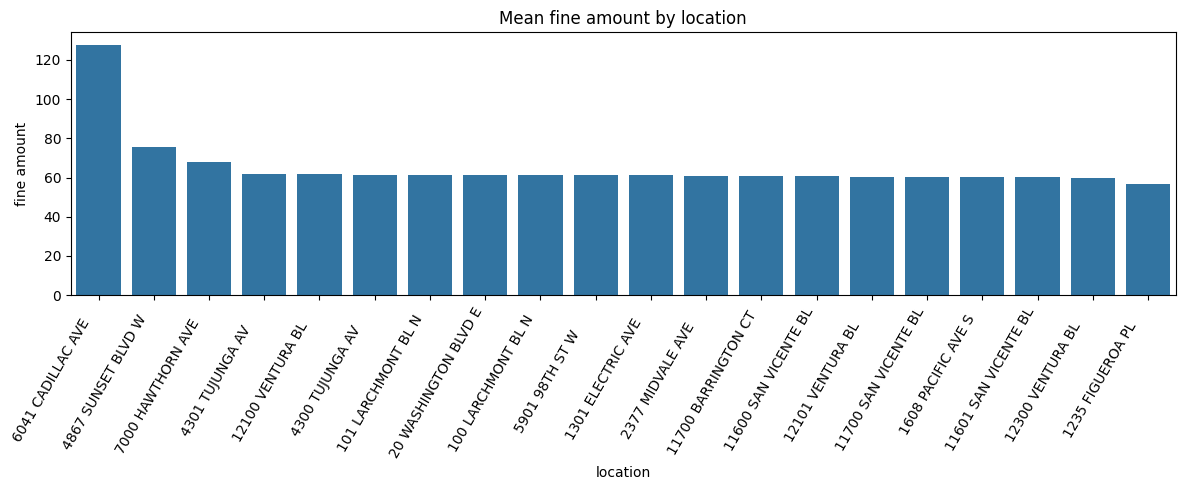

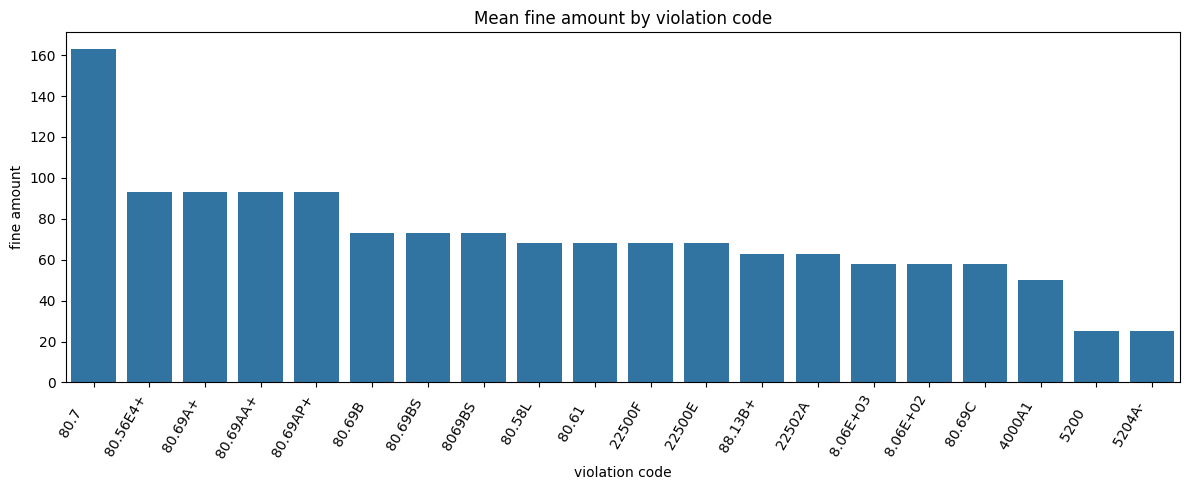

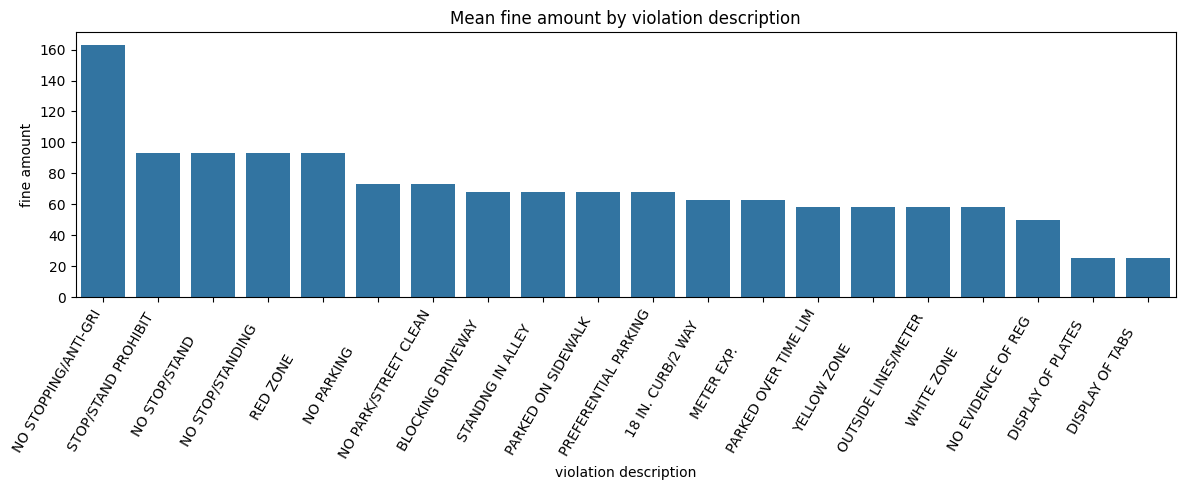

In [ ]:
#  correlation analysis (raw date)
import matplotlib.pyplot as plt
import seaborn as sns

num_cols_raw = ["issue_year","issue_month","issue_dow","is_weekend","fine amount"]
num_cols_raw = [c for c in num_cols_raw if c in df.columns]

corr_raw = df[num_cols_raw].corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_raw, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation analysis(raw split)')
plt.show()

# Categorical → target (RAW split)
target = "fine amount"
cats_raw = [c for c in ["rp state plate","body style","route","location","violation code","violation description"]
            if c in df.columns]

def bar_mean(col, topn=None):
    counts = df[col].value_counts(dropna=False)
    idx = counts.index if topn is None else counts.index[:topn]
    g = (df[df[col].isin(idx)]
         .groupby(col, dropna=False)[target]
         .mean()
         .reset_index()
         .sort_values(target, ascending=False))
    plt.figure(figsize=(12,5))
    sns.barplot(data=g, x=col, y=target)
    plt.title(f'Mean {target} by {col}')
    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()
    plt.show()

for c in cats_raw:
    nu = df[c].nunique(dropna=True)
    bar_mean(c, topn=None if nu <= 30 else 20)


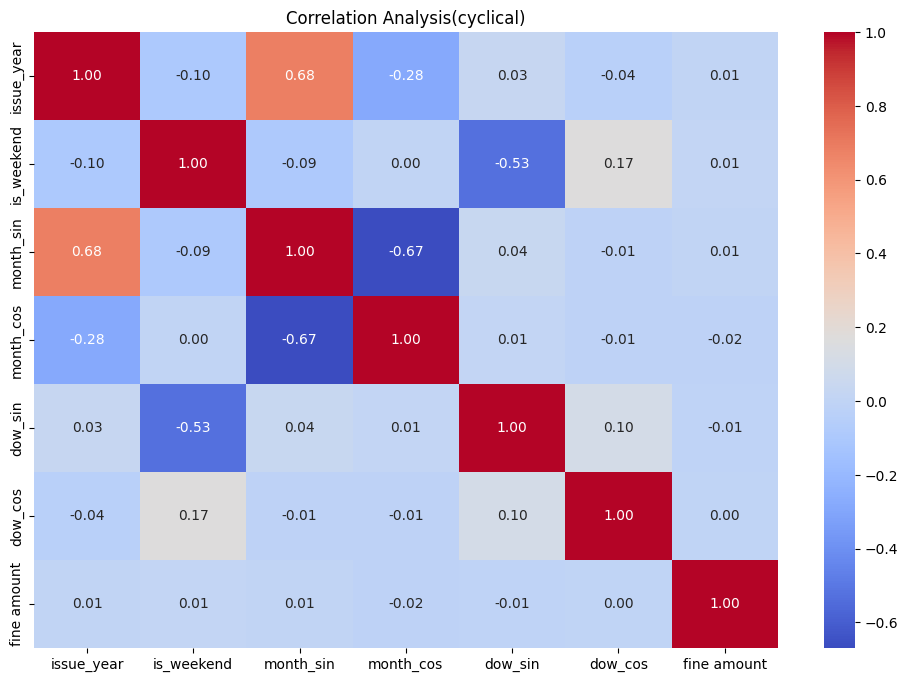

In [ ]:
# correlation analysis (cyclical) ===
import matplotlib.pyplot as plt
import seaborn as sns

num_cols_lin = ["issue_year","is_weekend","month_sin","month_cos","dow_sin","dow_cos","fine amount"]
num_cols_lin = [c for c in num_cols_lin if c in df.columns]

corr_lin = df[num_cols_lin].corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_lin, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis(cyclical)')
plt.show()



Retain/Remove

In [ ]:
attributes_to_retain = [
    'rp state plate',
    'body style',
    'route',
    'location',
    'issue_year',
    'issue_month',
    'issue_dow',
    'is_weekend',
    'month_sin', 'month_cos',
    'dow_sin', 'dow_cos',
    'fine amount'
]

attributes_to_discard = [
    'serial',
    'issue date',
    'violation code',
    'violation description'
]

print("Attributes potentially relevant for retraining:")
for attr in attributes_to_retain:
    print(f"- {attr}")

print("\nAttributes to discard:")
for attr in attributes_to_discard:
    print(f"- {attr}")

print("\nReasoning:")
print("- 'serial' is an identifier with no predictive signal and risks overfitting if used; keep only for tracking.")
print("- 'issue date' is superseded by derived parts (year/month/dow/is_weekend) and cyclical encodings.")
print("- 'rp state plate' and 'body style' are informative categoricals with manageable cardinality.")
print("- 'route' and 'location' are high-cardinality; retain but cap to top-N and map the rest to 'OTHER' before encoding.")
print("- Use one time encoding per model family: raw (issue_month/issue_dow) for trees, or sin/cos for linear/NN/K-Means.")
print("- 'fine amount' is the regression target and must be retained.")
print("Why we DROP 'violation code' and 'violation description':")
print("- They directly encode the statutory/base fine (the answer is inside these columns).")
print("- Using them would cause DATA LEAKAGE: the model would 'cheat' and look up the fine instead of learning.")
print("- Scores would look unrealistically good during training/validation, but won’t generalize in real use.")
print("- Our goal is to predict fine from context (time, route, location, body style, plate state), not from the law code itself.")
print("- We keep these columns ONLY for EDA/audit; we EXCLUDE them from training features.")



Attributes potentially relevant for retraining:
- rp state plate
- body style
- route
- location
- issue_year
- issue_month
- issue_dow
- is_weekend
- month_sin
- month_cos
- dow_sin
- dow_cos
- fine amount

Attributes to discard:
- serial
- issue date
- violation code
- violation description

Reasoning:
- 'serial' is an identifier with no predictive signal and risks overfitting if used; keep only for tracking.
- 'issue date' is superseded by derived parts (year/month/dow/is_weekend) and cyclical encodings.
- 'rp state plate' and 'body style' are informative categoricals with manageable cardinality.
- 'route' and 'location' are high-cardinality; retain but cap to top-N and map the rest to 'OTHER' before encoding.
- Use one time encoding per model family: raw (issue_month/issue_dow) for trees, or sin/cos for linear/NN/K-Means.
- 'fine amount' is the regression target and must be retained.
Why we DROP 'violation code' and 'violation description':
- They directly encode the statutory/base

Weekly/monthly fine

In [ ]:
if "issue_dow" in df.columns:
    print("\nmean fine by weekday (0=Mon..6=Sun):")
    print(df.groupby("issue_dow")["fine amount"].agg(["count","mean","median"]).round(2))
if "issue_month" in df.columns:
    print("\nmean fine by month:")
    print(df.groupby("issue_month")["fine amount"].agg(["count","mean","median"]).round(2))



mean fine by weekday (0=Mon..6=Sun):
            count   mean  median
issue_dow                       
0          173112  69.70    68.0
1          202132  69.43    68.0
2          202586  69.91    68.0
3          198508  69.88    68.0
4          186566  69.74    68.0
5           20195  69.92    63.0
6           53981  72.03    68.0

mean fine by month:
              count   mean  median
issue_month                       
1            275954  69.19    68.0
2            180469  69.31    68.0
3            195919  69.88    68.0
4            174690  70.37    68.0
5            143797  70.28    68.0
6              8644  76.50    68.0
7               776  68.74    68.0
8                17  72.12    73.0
9                17  58.24    50.0
10             2426  69.77    68.0
11            14244  67.34    63.0
12            40127  72.52    73.0


/tmp/ipython-input-2264726284.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="rp state plate", data=df[df["rp state plate"].isin(top_states)],
/tmp/ipython-input-2264726284.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target, y="rp state plate", data=g, palette="viridis")


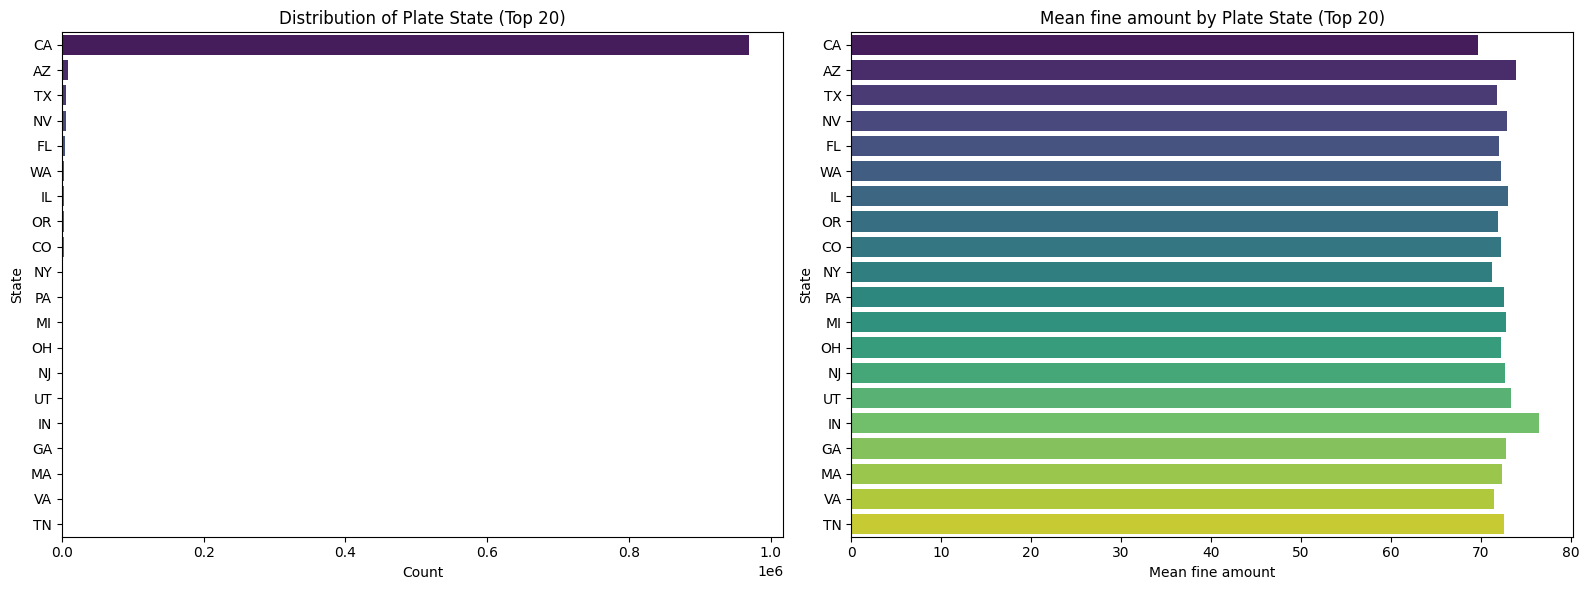

/tmp/ipython-input-2264726284.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="body style", data=df[df["body style"].isin(top_body)],
/tmp/ipython-input-2264726284.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target, y="body style", data=g, palette="plasma")


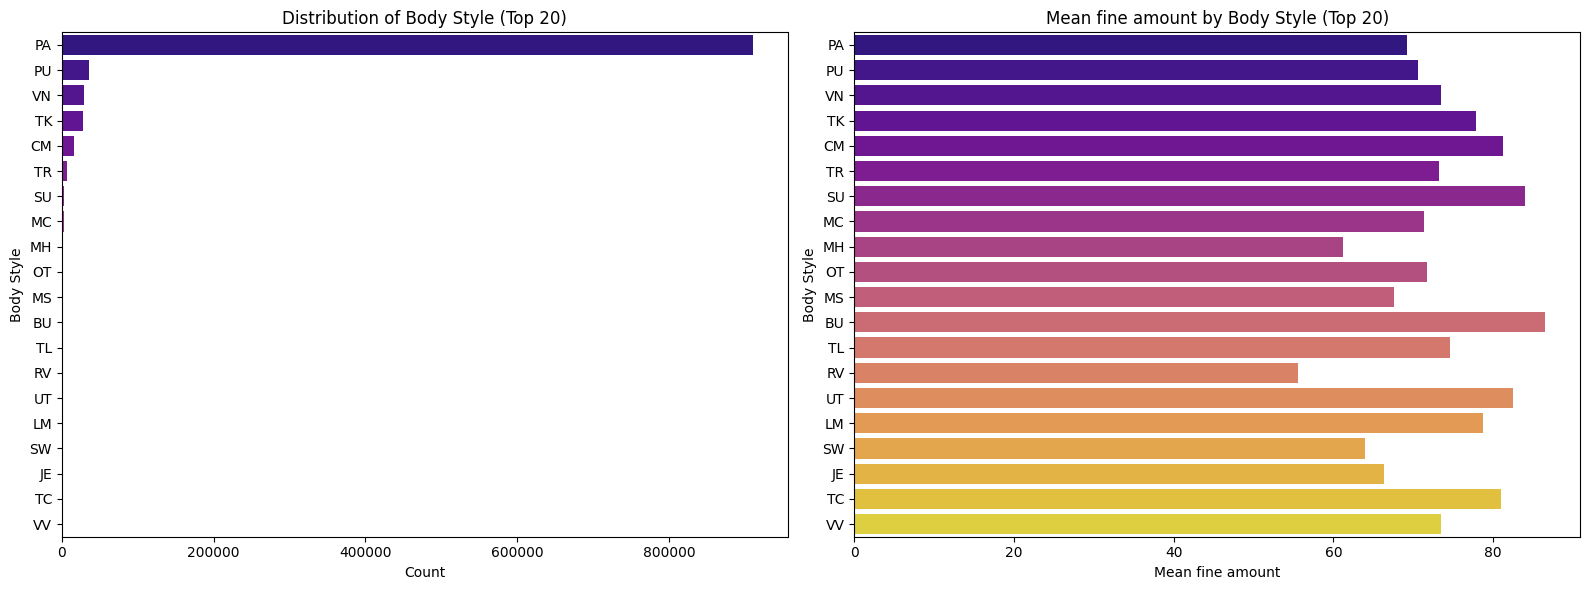

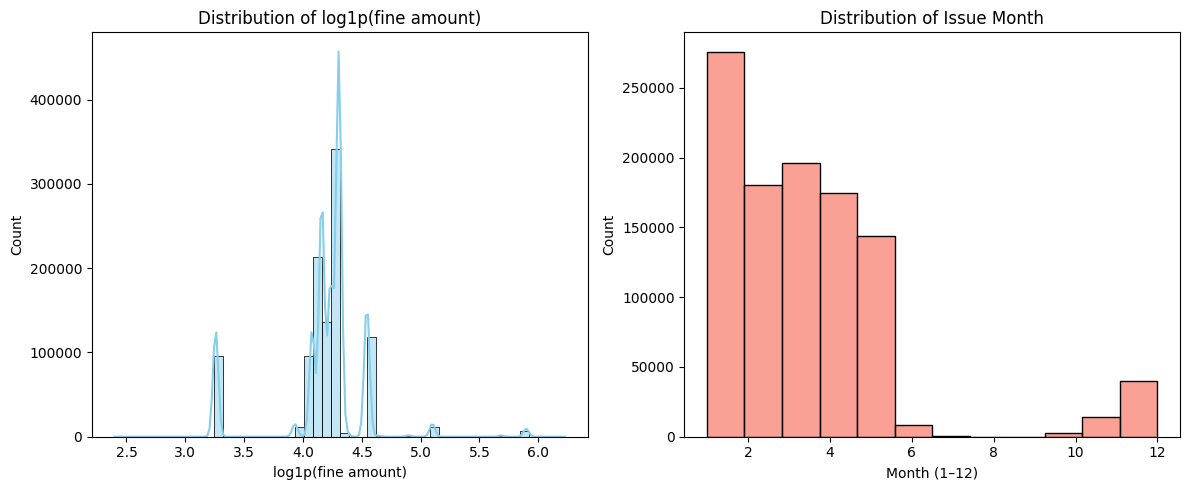

/tmp/ipython-input-2264726284.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="body style", y=target, data=df[df["body style"].isin(top_body10)],


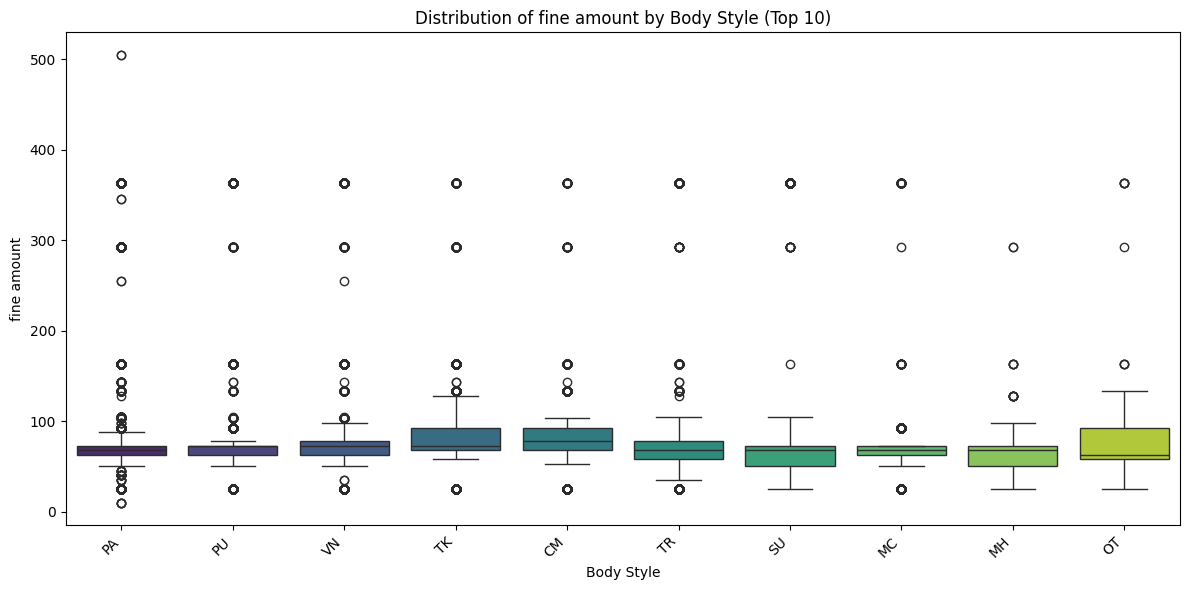

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target = "fine amount"
df[target] = pd.to_numeric(df[target], errors="coerce")

# -------- 1) Plate state: distribution + mean fine --------
top_states = df["rp state plate"].value_counts().index[:20]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(y="rp state plate", data=df[df["rp state plate"].isin(top_states)],
              order=top_states, palette="viridis")
plt.title("Distribution of Plate State (Top 20)")
plt.xlabel("Count"); plt.ylabel("State")

plt.subplot(1,2,2)
g = (df[df["rp state plate"].isin(top_states)]
     .groupby("rp state plate")[target].mean().loc[top_states].reset_index())
sns.barplot(x=target, y="rp state plate", data=g, palette="viridis")
plt.title(f"Mean {target} by Plate State (Top 20)")
plt.xlabel(f"Mean {target}"); plt.ylabel("State")
plt.tight_layout(); plt.show()

# -------- 2) Body style: distribution + mean fine --------
top_body = df["body style"].value_counts().index[:20]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(y="body style", data=df[df["body style"].isin(top_body)],
              order=top_body, palette="plasma")
plt.title("Distribution of Body Style (Top 20)")
plt.xlabel("Count"); plt.ylabel("Body Style")

plt.subplot(1,2,2)
g = (df[df["body style"].isin(top_body)]
     .groupby("body style")[target].mean().loc[top_body].reset_index())
sns.barplot(x=target, y="body style", data=g, palette="plasma")
plt.title(f"Mean {target} by Body Style (Top 20)")
plt.xlabel(f"Mean {target}"); plt.ylabel("Body Style")
plt.tight_layout(); plt.show()

# -------- 3) Histograms: fine amount (log1p) + issue_month --------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
fa = df[target].dropna()
fa = fa[fa > 0]
sns.histplot(np.log1p(fa), kde=True, bins=50, color="skyblue")
plt.title(f"Distribution of log1p({target})"); plt.xlabel(f"log1p({target})"); plt.ylabel("Count")

plt.subplot(1,2,2)
if "issue_month" in df.columns:
    sns.histplot(df["issue_month"].dropna(), kde=False, bins=12, color="salmon")
    plt.title("Distribution of Issue Month"); plt.xlabel("Month (1–12)"); plt.ylabel("Count")
else:
    sns.histplot(df["issue_year"].dropna(), kde=False, bins=30, color="salmon")
    plt.title("Distribution of Issue Year"); plt.xlabel("Year"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

# -------- 4) Box plot: fine amount across body style (Top 10 by frequency) --------
top_body10 = df["body style"].value_counts().index[:10]
plt.figure(figsize=(12,6))
sns.boxplot(x="body style", y=target, data=df[df["body style"].isin(top_body10)],
            order=top_body10, palette="viridis")
plt.title(f"Distribution of {target} by Body Style (Top 10)")
plt.xlabel("Body Style"); plt.ylabel(target); plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()




Ticket per month

In [ ]:
df["issue_month_key"] = df["issue_year"].astype(str) + "-" + df["issue_month"].astype(str).str.zfill(2)
g = (df.groupby("issue_month_key")["fine amount"]
       .agg(count="size", mean="mean").reset_index())
print(g.tail(12))


   issue_month_key   count        mean
33         2015-09      16   60.312500
34         2015-10       7   63.857143
35         2015-11     126  146.293651
36         2015-12   18182   74.549445
37         2016-01  175002   69.615342
38         2016-02  180436   69.310587
39         2016-03  195900   69.885375
40         2016-04  174677   70.366562
41         2016-05  143771   70.279841
42         2016-06    8628   76.462680
43         2016-07     775   68.745806
44         2018-10     187   69.759358


Avova Test

In [ ]:
from scipy.stats import f_oneway
import pandas as pd

valid_categorical_cols_for_anova = [
    "rp state plate",
    "body style",
    "route",
    "location",
]

TARGET = "fine amount"
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")

print(f"ANOVA test results for categorical features vs. {TARGET}:")

for col in valid_categorical_cols_for_anova:
    if col not in df.columns:
        print(f"Column: {col}\n  Skipped (not in DataFrame).")
        continue

    groups = df.groupby(col)[TARGET].apply(lambda s: pd.to_numeric(s, errors="coerce").dropna().tolist())
    groups = groups[groups.apply(lambda x: len(x) >= 2)]  # f_oneway needs >= 2 per group

    if not groups.empty and len(groups) >= 2:
        f_statistic, p_value = f_oneway(*groups)
        print(f"Column: {col}")
        print(f"  F-statistic: {f_statistic:.4f}")
        print(f"  P-value: {p_value:.4f}")
    else:
        print(f"Column: {col}")
        print("  Not enough data in groups to perform ANOVA.")


ANOVA test results for categorical features vs. fine amount:
Column: rp state plate
  F-statistic: 9.3312
  P-value: 0.0000
Column: body style
  F-statistic: 125.1247
  P-value: 0.0000
Column: route
  F-statistic: 81.3174
  P-value: 0.0000
Column: location
  F-statistic: 7.8792
  P-value: 0.0000


ANOVA test results for categorical features vs. fine amount:
Column: rp state plate
  F-statistic: 9.3312
  P-value: 0.0000
Column: body style
  F-statistic: 125.1247
  P-value: 0.0000
Column: route
  F-statistic: 81.3174
  P-value: 0.0000
Column: location
  F-statistic: 7.8792
  P-value: 0.0000


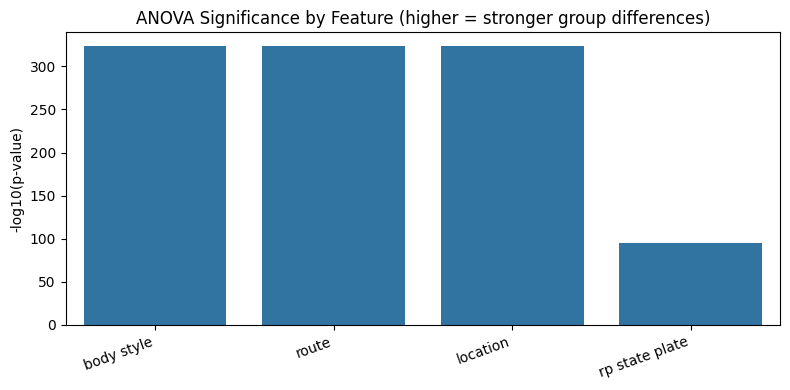

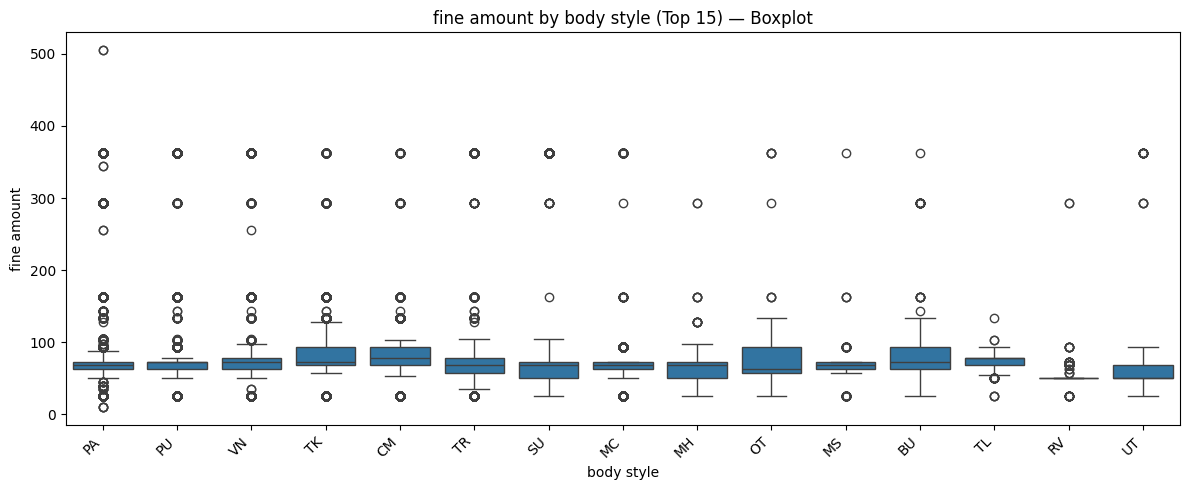

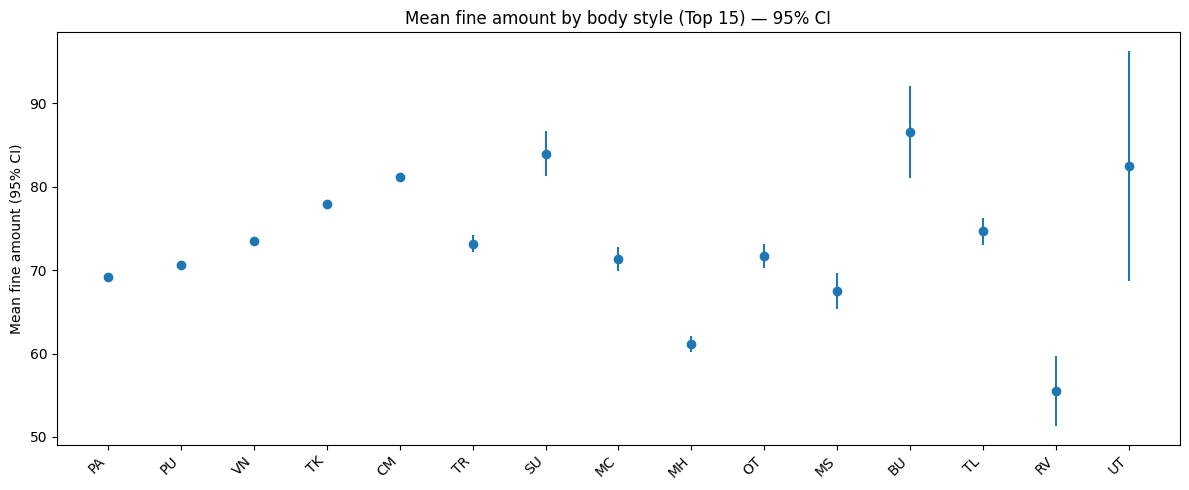

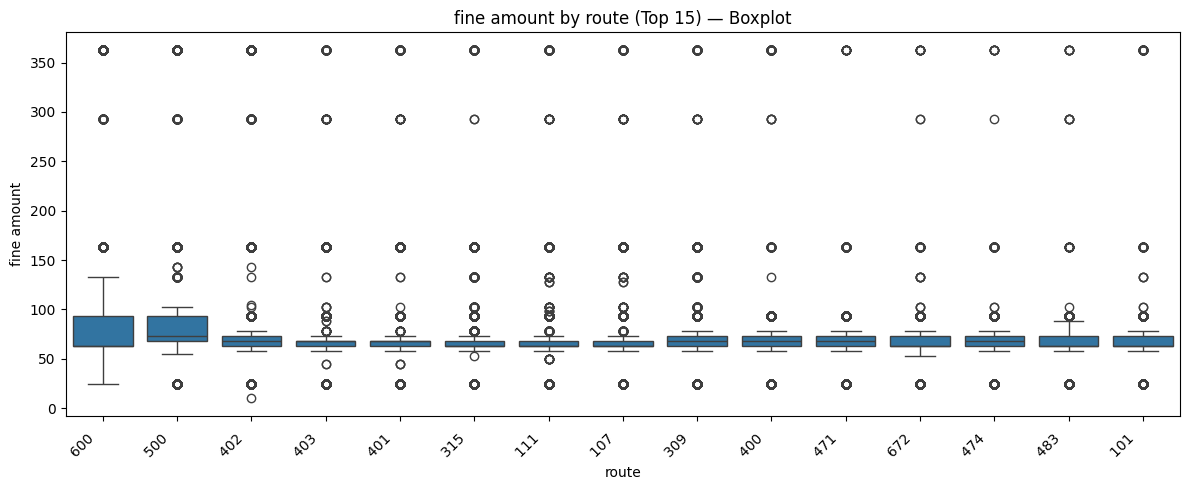

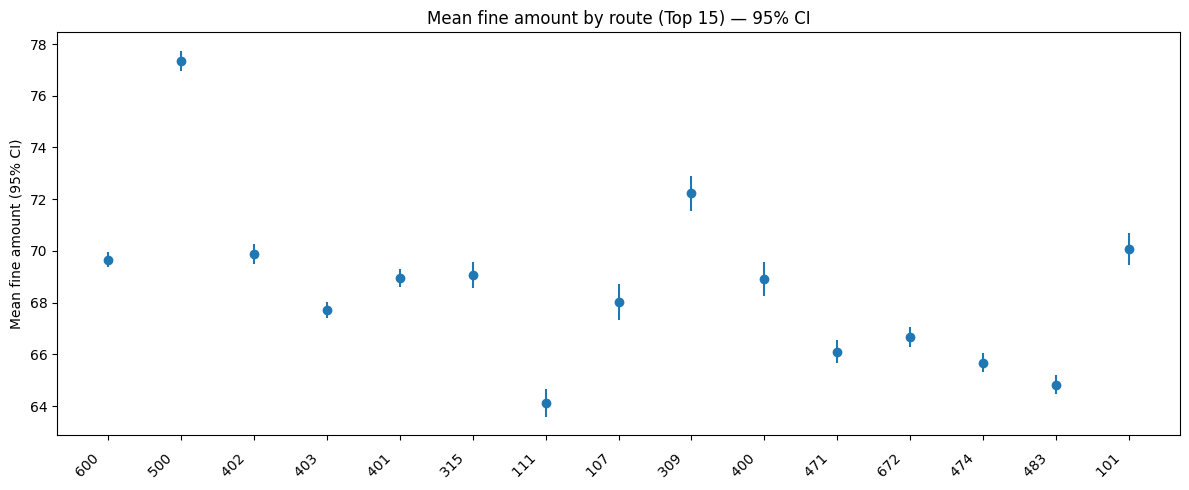

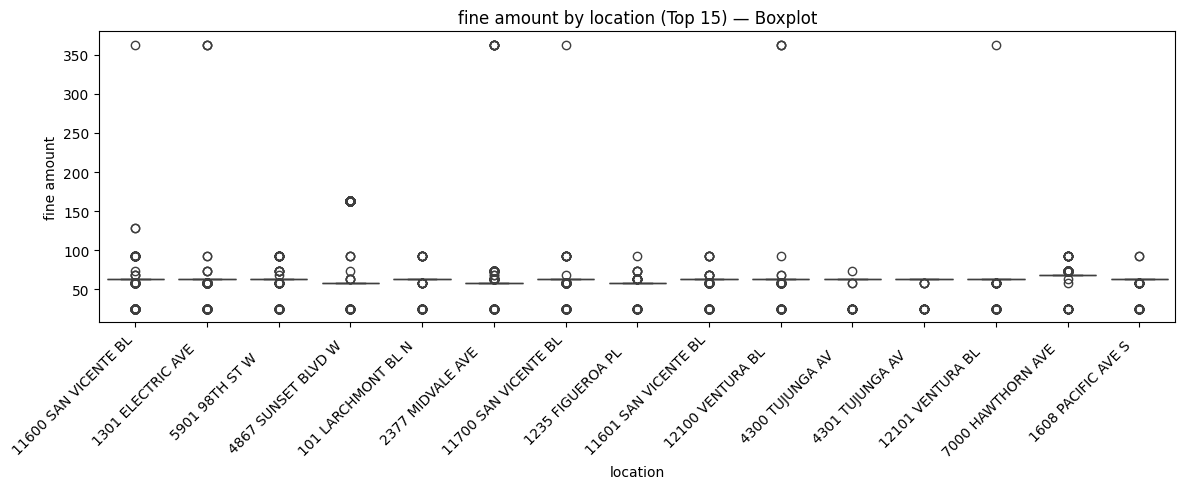

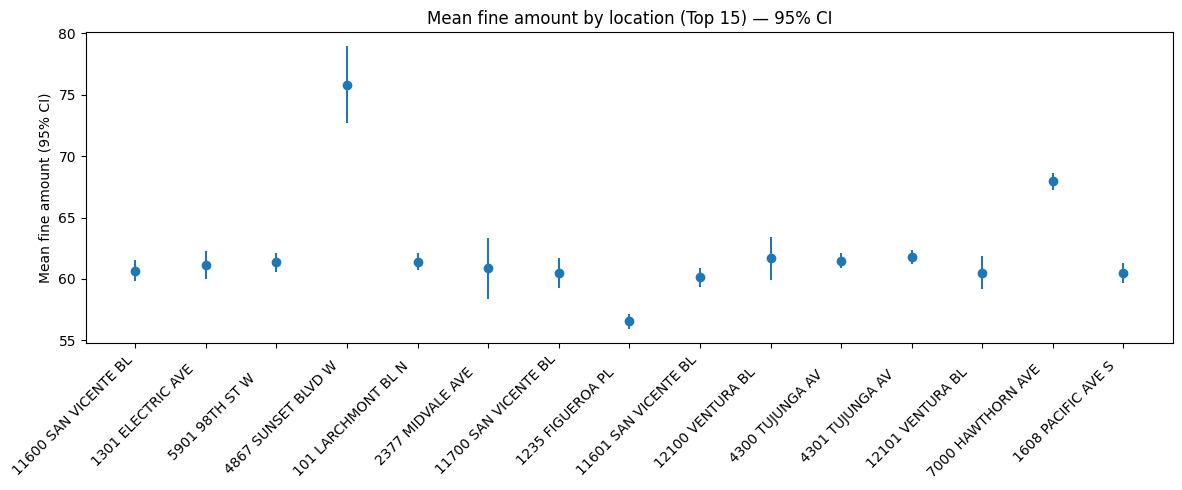

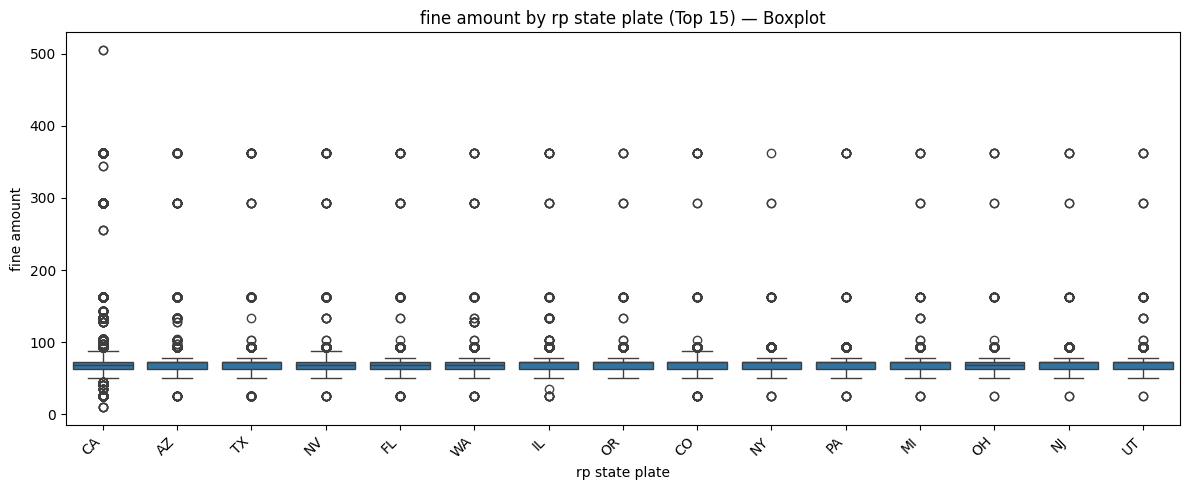

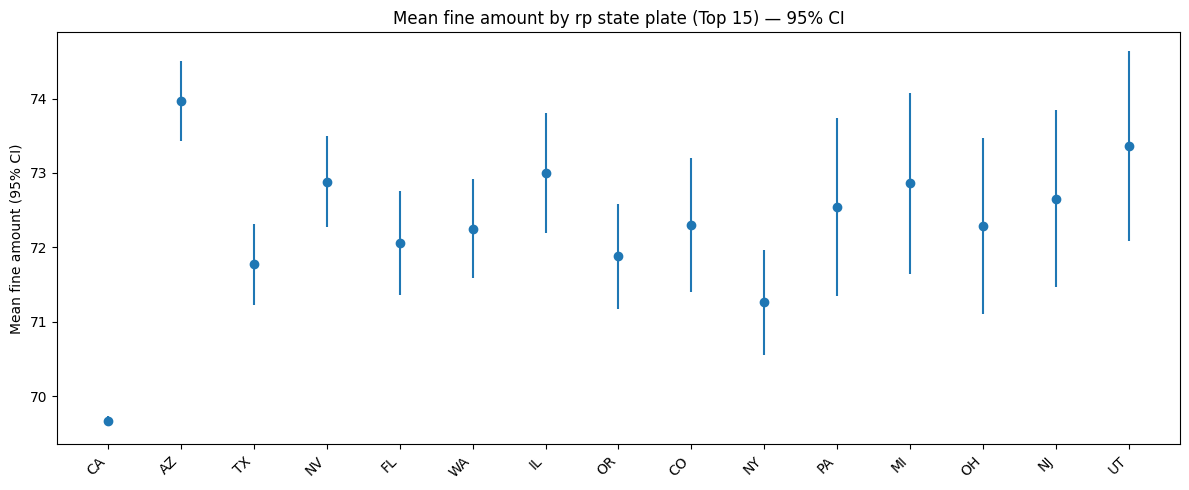

In [ ]:
from scipy.stats import f_oneway
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

valid_categorical_cols_for_anova = [
    "rp state plate",
    "body style",
    "route",
    "location",
]

TARGET = "fine amount"
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")

print(f"ANOVA test results for categorical features vs. {TARGET}:")

anova_rows = []
topk = 15
top_vals = {}

for col in valid_categorical_cols_for_anova:
    if col not in df.columns:
        print(f"Column: {col}\n  Skipped (not in DataFrame).")
        continue

    groups = df.groupby(col)[TARGET].apply(lambda s: pd.to_numeric(s, errors="coerce").dropna().tolist())
    groups = groups[groups.apply(lambda x: len(x) >= 2)]  # f_oneway needs >= 2 per group

    if not groups.empty and len(groups) >= 2:
        f_statistic, p_value = f_oneway(*groups)
        print(f"Column: {col}")
        print(f"  F-statistic: {f_statistic:.4f}")
        print(f"  P-value: {p_value:.4f}")

        anova_rows.append({"feature": col, "F_stat": f_statistic, "p_value": p_value})
        top_vals[col] = df[col].value_counts().head(topk).index.tolist()
    else:
        print(f"Column: {col}")
        print("  Not enough data in groups to perform ANOVA.")

# Summary significance bar
if anova_rows:
    anova_df = pd.DataFrame(anova_rows).sort_values("p_value")
    anova_df["minus_log10_p"] = -np.log10(anova_df["p_value"].replace(0, np.nextafter(0,1)))

    plt.figure(figsize=(8,4))
    sns.barplot(data=anova_df, x="feature", y="minus_log10_p")
    plt.xticks(rotation=20, ha="right")
    plt.ylabel("-log10(p-value)")
    plt.xlabel("")
    plt.title("ANOVA Significance by Feature (higher = stronger group differences)")
    plt.tight_layout()
    plt.show()

    #  Per-feature visuals
    for col in anova_df["feature"]:
        if col not in top_vals:
            continue
        vals = top_vals[col]
        sub = df[df[col].isin(vals)].dropna(subset=[TARGET]).copy()

        #  Boxplot of fine amount by top categories
        plt.figure(figsize=(12,5))
        order = sub[col].value_counts().index.tolist()
        sns.boxplot(data=sub, x=col, y=TARGET, order=order, showfliers=True)
        plt.xticks(rotation=45, ha="right")
        plt.xlabel(col); plt.ylabel(TARGET)
        plt.title(f"{TARGET} by {col} (Top {len(order)}) — Boxplot")
        plt.tight_layout()
        plt.show()

        #  Mean with 95% CI (error bars)
        agg = (sub.groupby(col)[TARGET]
               .agg(["mean","std","count"])
               .loc[order]
               .reset_index())
        agg["se"] = agg["std"] / np.sqrt(agg["count"].replace(0, np.nan))
        agg["ci95"] = 1.96 * agg["se"]

        plt.figure(figsize=(12,5))
        x = np.arange(len(agg))
        plt.errorbar(x, agg["mean"], yerr=agg["ci95"], fmt="o")
        plt.xticks(x, agg[col], rotation=45, ha="right")
        plt.ylabel(f"Mean {TARGET} (95% CI)")
        plt.title(f"Mean {TARGET} by {col} (Top {len(agg)}) — 95% CI")
        plt.tight_layout()
        plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway

TARGET = "fine amount"
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")

# Selected categoricals
selected_cats = ["rp state plate","body style","route","location"]

# --- ANOVA p-values ---
ALPHA = 0.05
anova_p = {}
for col in selected_cats:
    if col not in df.columns:
        continue
    groups = df.groupby(col)[TARGET].apply(lambda s: pd.to_numeric(s, errors="coerce").dropna().values)
    groups = [g for g in groups if len(g) >= 2]
    if len(groups) >= 2:
        F, p = f_oneway(*groups)
        anova_p[col] = p

# --- Effect size (η²) ---
def eta_squared(col):
    g = df.groupby(col)[TARGET].agg(['size','mean']).dropna()
    y = pd.to_numeric(df[TARGET], errors="coerce").dropna().values
    if len(y) == 0:
        return np.nan
    ybar = y.mean()
    ss_between = (g['size'] * (g['mean'] - ybar)**2).sum()
    ss_total   = ((y - ybar)**2).sum()
    return float(ss_between/ss_total) if ss_total > 0 else np.nan

ETA_THRESHOLD = 0.01
eta2 = {col: eta_squared(col) for col in selected_cats if col in df.columns}

# --- Sets ---
anova_sig = {c for c,p in anova_p.items() if p < ALPHA}
eta_sig   = {c for c,v in eta2.items() if pd.notna(v) and v >= ETA_THRESHOLD}

both        = sorted(list(anova_sig & eta_sig))
anova_only  = sorted(list(anova_sig - eta_sig))
eta_only    = sorted(list(eta_sig - anova_sig))

print("Important by BOTH ANOVA & η²:")
print(both if both else ["None"])

print("\nImportant by ANOVA ONLY:")
print(anova_only if anova_only else ["None"])

print("\nImportant by η² ONLY:")
print(eta_only if eta_only else ["None"])


Important by BOTH ANOVA & η²:
['location', 'route']

Important by ANOVA ONLY:
['body style', 'rp state plate']

Important by η² ONLY:
['None']


null check and drop

In [ ]:
print("Number of nulls in 'fine amount' before dropping:", df['fine amount'].isnull().sum())
df.dropna(subset=['fine amount'], inplace=True)
print("Number of nulls in 'fine amount' after dropping:", df['fine amount'].isnull().sum())

Number of nulls in 'fine amount' before dropping: 0
Number of nulls in 'fine amount' after dropping: 0


In [ ]:
display(attributes_to_retain)

['rp state plate',
 'body style',
 'route',
 'location',
 'issue_year',
 'issue_month',
 'issue_dow',
 'is_weekend',
 'month_sin',
 'month_cos',
 'dow_sin',
 'dow_cos',
 'fine amount']

In [ ]:
import numpy as np
import pandas as pd

# === 0) Pick features for your parking-fine project ===
selected_features = [
    # target
    "fine amount",
    # time features you already created
    "issue_year","issue_month","issue_dow","is_weekend",
    "month_sin","month_cos","dow_sin","dow_cos",
    # selected categoricals (leakage cols like violation code/description intentionally NOT included)
    "rp state plate","body style","route","location"
]

selected_features = [c for c in selected_features if c in df.columns]

print("Missing values in selected features BEFORE imputation:")
print(df[selected_features].isnull().sum().sort_values(ascending=False))

# === 1) Split numeric / categorical (exclude target from imputation) ===
num_feats = df[selected_features].select_dtypes(include=["number"]).columns.tolist()
cat_feats = df[selected_features].select_dtypes(include="object").columns.tolist()
num_feats = [c for c in num_feats if c != "fine amount"]  # don't impute target

# === 2) Impute numeric (median) ===
for col in num_feats:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# === 3) Impute categoricals (mode) ===
for col in cat_feats:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode(dropna=True)[0])

print("\nMissing values in selected features AFTER imputation:")
print(df[selected_features].isnull().sum().sort_values(ascending=False))

print("Missing-value check & imputation (summary)")
print("- We counted NaNs in all selected features BEFORE and AFTER imputation.")
print("- Result: every column shows 0 missing values in both checks (see tables above).")
print("- Therefore, no values were actually filled; the dataset is already clean.")
print("- We still keep the imputation step for safety:")
print("    • If NaNs appear later (after merges/encodings),")
print("      numeric columns will be filled with the median,")
print("      and categorical columns will be filled with the mode,")
print("      so the model will not break.")


Missing values in selected features BEFORE imputation:
fine amount       0
issue_year        0
issue_month       0
issue_dow         0
is_weekend        0
month_sin         0
month_cos         0
dow_sin           0
dow_cos           0
rp state plate    0
body style        0
route             0
location          0
dtype: int64

Missing values in selected features AFTER imputation:
fine amount       0
issue_year        0
issue_month       0
issue_dow         0
is_weekend        0
month_sin         0
month_cos         0
dow_sin           0
dow_cos           0
rp state plate    0
body style        0
route             0
location          0
dtype: int64
Missing-value check & imputation (summary)
- We counted NaNs in all selected features BEFORE and AFTER imputation.
- Result: every column shows 0 missing values in both checks (see tables above).
- Therefore, no values were actually filled; the dataset is already clean.
- We still keep the imputation step for safety:
    • If NaNs appear late

split:  test ,val,train 20|20|60%

In [ ]:
import numpy as np
import pandas as pd

order = pd.to_datetime(df["issue date"], errors="coerce")
df = df.assign(_order=order).dropna(subset=["_order"]).sort_values("_order")

n = len(df)
i1, i2 = int(n*0.60), int(n*0.80)
df.loc[df.index[:i1],  "split"] = "train"
df.loc[df.index[i1:i2],"split"] = "val"
df.loc[df.index[i2:],  "split"] = "test"

train_idx = df.index[df["split"]=="train"]
val_idx   = df.index[df["split"]=="val"]
test_idx  = df.index[df["split"]=="test"]

print(df["split"].value_counts())


split
train    622248
val      207416
test     207416
Name: count, dtype: int64


/tmp/ipython-input-35101910.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='split', data=df, order=['train', 'val', 'test'], palette='viridis')


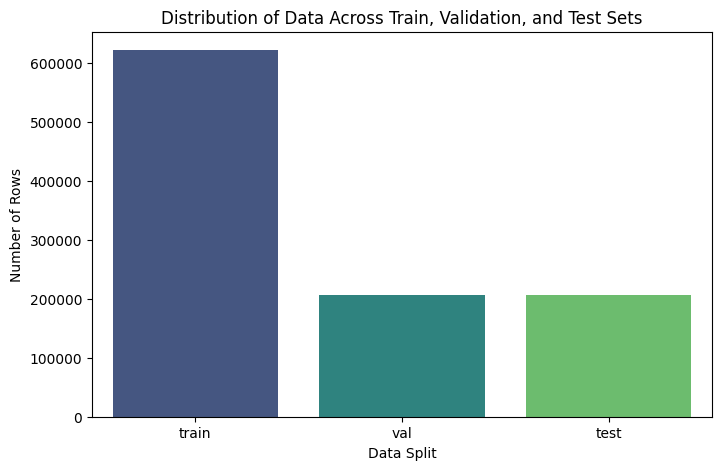

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if "split" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='split', data=df, order=['train', 'val', 'test'], palette='viridis')
    plt.title('Distribution of Data Across Train, Validation, and Test Sets')
    plt.xlabel('Data Split')
    plt.ylabel('Number of Rows')
    plt.show()
else:
    print("The 'split' column does not exist. Please run the cell that creates the train/val/test split first.")

In [ ]:
# Trees view (raw month/dow)
feat_trees = [c for c in ["issue_year","issue_month","issue_dow","is_weekend",
                          "rp state plate","body style","route","location"] if c in df.columns]

# Linear/NN view (cyclical)
feat_cyc = [c for c in ["issue_year","is_weekend","month_sin","month_cos","dow_sin","dow_cos",
                        "rp state plate","body style","route","location"] if c in df.columns]

y = df["fine amount"]

Xtr_t = df.loc[train_idx, feat_trees];  ytr = y.loc[train_idx]
Xva_t = df.loc[val_idx,   feat_trees];  yva = y.loc[val_idx]
Xte_t = df.loc[test_idx,  feat_trees];  yte = y.loc[test_idx]

Xtr_c = df.loc[train_idx, feat_cyc]
Xva_c = df.loc[val_idx,   feat_cyc]
Xte_c = df.loc[test_idx,  feat_cyc]

print("Feature views + splits summary")
print("- We build TWO views of the same data:")
print("  1) Trees view (RAW time): issue_year, issue_month, issue_dow, is_weekend + 4 categoricals.")
print("  2) Linear/NN view (CYCLICAL time): month_sin/cos, dow_sin/cos + issue_year, is_weekend + 4 categoricals.")
print("- Target (y): 'fine amount'.")
print("- We slice each view into train/val/test using the given indices:")
print("  Trees -> Xtr_t, Xva_t, Xte_t with ytr, yva, yte.")
print("  Cyc    -> Xtr_c, Xva_c, Xte_c with ytr, yva, yte.")
print("- Purpose: train two separate pipelines (trees vs linear/NN) without mixing raw and cyclical time features.")



Feature views + splits summary
- We build TWO views of the same data:
  1) Trees view (RAW time): issue_year, issue_month, issue_dow, is_weekend + 4 categoricals.
  2) Linear/NN view (CYCLICAL time): month_sin/cos, dow_sin/cos + issue_year, is_weekend + 4 categoricals.
- Target (y): 'fine amount'.
- We slice each view into train/val/test using the given indices:
  Trees -> Xtr_t, Xva_t, Xte_t with ytr, yva, yte.
  Cyc    -> Xtr_c, Xva_c, Xte_c with ytr, yva, yte.
- Purpose: train two separate pipelines (trees vs linear/NN) without mixing raw and cyclical time features.


In [ ]:
# Only trees view
print("Xtr_t shape:", Xtr_t.shape)
display(Xtr_t.head(10))

# Only cyclical view
print("Xtr_c shape:", Xtr_c.shape)
display(Xtr_c.head(10))


Xtr_t shape: (622248, 8)


,issue_year,issue_month,issue_dow,is_weekend,rp state plate,body style,route,location
882646,2010,6,3,0,CA,PA,24MQ4,7601 S BROADWAY
171135,2011,1,2,0,CA,PA,403,290 FRANCIS ST
424071,2011,3,6,1,CA,PA,403,4609 W RUSSELL AV
889002,2012,1,4,0,CA,PA,376,7123 REMMET AVE
452321,2012,2,6,1,CA,PA,5SL85,658 W SHEPARD ST
424079,2012,3,1,0,CA,PA,403,3315 W SAN MARINO
462790,2012,3,3,0,CA,PA,3C302,L/L 500 WORLD WAY
885446,2012,5,4,0,CA,VN,MQ11,LINDLEY N/O CHATSWOR
454591,2012,12,5,1,CA,PA,535,1034 S WESTMORELAND
18866,2012,12,6,1,CA,PA,3RD,812 N SWEETZER AV


Xtr_c shape: (622248, 10)


,issue_year,is_weekend,month_sin,month_cos,dow_sin,dow_cos,rp state plate,body style,route,location
882646,2010,0,0.500000,-0.866025,0.433884,-0.900969,CA,PA,24MQ4,7601 S BROADWAY
171135,2011,0,0.000000,1.000000,0.974928,-0.222521,CA,PA,403,290 FRANCIS ST
424071,2011,1,0.866025,0.500000,-0.781831,0.623490,CA,PA,403,4609 W RUSSELL AV
889002,2012,0,0.000000,1.000000,-0.433884,-0.900969,CA,PA,376,7123 REMMET AVE
452321,2012,1,0.500000,0.866025,-0.781831,0.623490,CA,PA,5SL85,658 W SHEPARD ST
424079,2012,0,0.866025,0.500000,0.781831,0.623490,CA,PA,403,3315 W SAN MARINO
462790,2012,0,0.866025,0.500000,0.433884,-0.900969,CA,PA,3C302,L/L 500 WORLD WAY
885446,2012,0,0.866025,-0.500000,-0.433884,-0.900969,CA,VN,MQ11,LINDLEY N/O CHATSWOR
454591,2012,1,-0.500000,0.866025,-0.974928,-0.222521,CA,PA,535,1034 S WESTMORELAND
18866,2012,1,-0.500000,0.866025,-0.781831,0.623490,CA,PA,3RD,812 N SWEETZER AV


In [ ]:
# ==== Linear (Ridge) with cyc features)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

TARGET = "fine amount"

train_mask = df["split"] == "train"
val_mask   = df["split"] == "val"
test_mask  = df["split"] == "test"

# ---- Cyclical numeric features for linear models ----
num_cyc = [c for c in ["issue_year","is_weekend","month_sin","month_cos","dow_sin","dow_cos"] if c in df.columns]

ignore = {TARGET, "split", "_order"}
cat_all = df.drop(columns=list(ignore & set(df.columns)), errors="ignore").select_dtypes(include="object").columns.tolist()

# Split frames
X_train = df.loc[train_mask, num_cyc + cat_all].copy()
y_train = df.loc[train_mask, TARGET].astype(float).values
X_val   = df.loc[val_mask,   num_cyc + cat_all].copy()
y_val   = df.loc[val_mask,   TARGET].astype(float).values
X_test  = df.loc[test_mask,  num_cyc + cat_all].copy()
y_test  = df.loc[test_mask,  TARGET].astype(float).values

card_threshold = 200
cat_nunique = {c: X_train[c].nunique(dropna=False) for c in cat_all}
high_card = [c for c,n in cat_nunique.items() if n > card_threshold]
low_card  = [c for c,n in cat_nunique.items() if n <= card_threshold]

def kfold_target_encode(train_series, y, n_splits=5, seed=42):
    """
    Returns out-of-fold encoded values for train_series and a mapping dict for test/val.
    """
    train_series = train_series.astype(str).fillna("__NA__")
    global_mean = float(np.mean(y))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    oof = np.zeros(len(train_series), dtype=float)

    for tr_idx, te_idx in kf.split(train_series):
        means = pd.DataFrame({"cat": train_series.iloc[tr_idx].values, "y": y[tr_idx]}).groupby("cat")["y"].mean()
        oof[te_idx] = train_series.iloc[te_idx].map(means).fillna(global_mean).values

    # final mapping learned on full train
    full_map = pd.DataFrame({"cat": train_series.values, "y": y}).groupby("cat")["y"].mean().to_dict()
    return oof, full_map, global_mean


te_maps = {}
for col in high_card:
    oof_vals, mapping, gmean = kfold_target_encode(X_train[col], y_train)
    X_train[f"TE__{col}"] = oof_vals
    # apply to val/test
    X_val[f"TE__{col}"]   = X_val[col].astype(str).fillna("__NA__").map(mapping).fillna(gmean).astype(float)
    X_test[f"TE__{col}"]  = X_test[col].astype(str).fillna("__NA__").map(mapping).fillna(gmean).astype(float)
    te_maps[col] = (mapping, gmean)

X_train_lin = X_train.drop(columns=high_card)
X_val_lin   = X_val.drop(columns=high_card)
X_test_lin  = X_test.drop(columns=high_card)

num_all = [c for c in X_train_lin.columns if c in num_cyc or c.startswith("TE__")]
cat_small = [c for c in X_train_lin.columns if c in low_card]


pre = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler",  StandardScaler())
        ]), num_all),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_small), # use sparse_output=True
    ],
    remainder="drop"
)

lin = Ridge(alpha=1.0, random_state=42)
pipe = Pipeline([("prep", pre), ("model", lin)])

# ---- Fit ----
print("Training Ridge Regressor with Target Encoding...")
pipe.fit(X_train_lin, y_train)
print("Ridge Regressor training complete.")

# ---- Predict ----
pred_val  = pipe.predict(X_val_lin)
pred_test = pipe.predict(X_test_lin)

#  Metrics
def smape(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    return np.mean(2.0*np.abs(y_pred - y_true) / ((np.abs(y_true)+np.abs(y_pred))+eps))

def mape(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom))

def rmsle(y_true, y_pred):
    y_true = np.maximum(np.asarray(y_true), 0)
    y_pred = np.maximum(np.asarray(y_pred), 0)
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred))**2))

def error_percentiles(y_true, y_pred, qs=(50,80,90,95)):
    e = np.abs(np.asarray(y_pred) - np.asarray(y_true))
    return {f"P{q}": float(np.percentile(e, q)) for q in qs}

def report_all(y_true, y_pred, name):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    med  = median_absolute_error(y_true, y_pred)
    mp   = mape(y_true, y_pred)*100
    sp   = smape(y_true, y_pred)*100
    rl   = rmsle(y_true, y_pred)
    per  = error_percentiles(y_true, y_pred)
    print(f"{name}:")
    print(f"  MAE={mae:.2f} | RMSE={rmse:.2f} | MedAE={med:.2f} | R²={r2:.3f}")
    print(f"  MAPE={mp:.2f}% | SMAPE={sp:.2f}% | RMSLE={rl:.4f}")
    print(f"  |error| percentiles: {per}\n")


# ---- Evaluate ----
report_all(y_val,  pred_val,  "Ridge (cyc+TE) (val)")
report_all(y_test, pred_test, "Ridge (cyc+TE) (test)")

Training Ridge Regressor with Target Encoding...
Ridge Regressor training complete.
Ridge (cyc+TE) (val):
  MAE=0.39 | RMSE=1.67 | MedAE=0.44 | R²=0.997
  MAPE=0.59% | SMAPE=0.58% | RMSLE=0.0183
  |error| percentiles: {'P50': 0.4361099946985192, 'P80': 0.48312561987462743, 'P90': 0.4992990993268336, 'P95': 0.5328539625614539}

Ridge (cyc+TE) (test):
  MAE=0.83 | RMSE=1.85 | MedAE=0.78 | R²=0.997
  MAPE=1.32% | SMAPE=1.30% | RMSLE=0.0226
  |error| percentiles: {'P50': 0.7810223745552705, 'P80': 0.807678048829132, 'P90': 0.8553065643485525, 'P95': 1.0879529355574924}



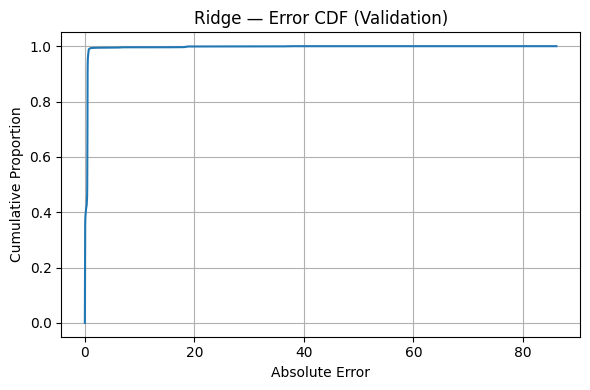

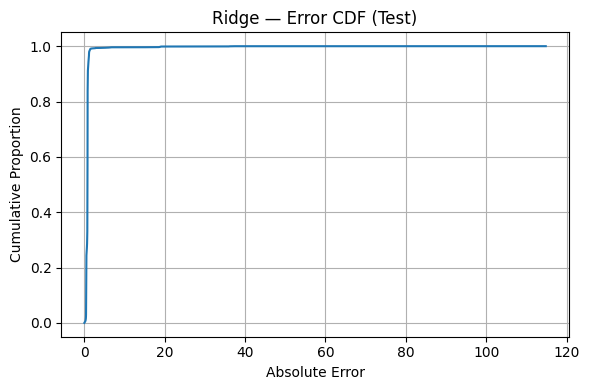

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def error_cdf(y_true, y_pred, title="Error CDF"):
    errors = np.abs(np.asarray(y_true) - np.asarray(y_pred))
    errors = np.sort(errors)
    n = len(errors)
    cdf = np.arange(n) / n

    plt.figure(figsize=(6, 4))
    plt.plot(errors, cdf)
    plt.title(title)
    plt.xlabel("Absolute Error")
    plt.ylabel("Cumulative Proportion")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

error_cdf(y_val, pred_val, title="Ridge — Error CDF (Validation)")
error_cdf(y_test, pred_test, title="Ridge — Error CDF (Test)")

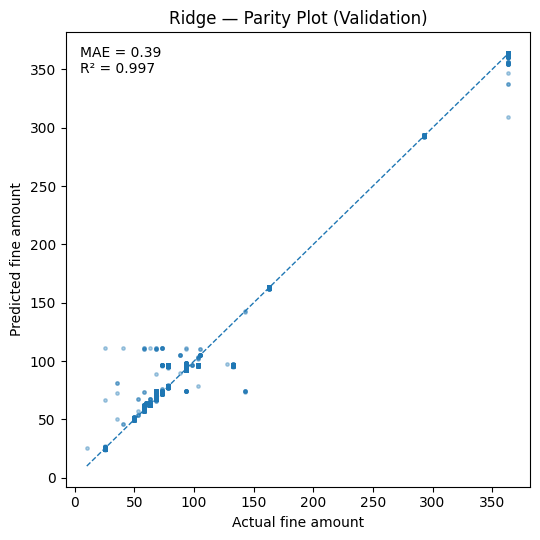

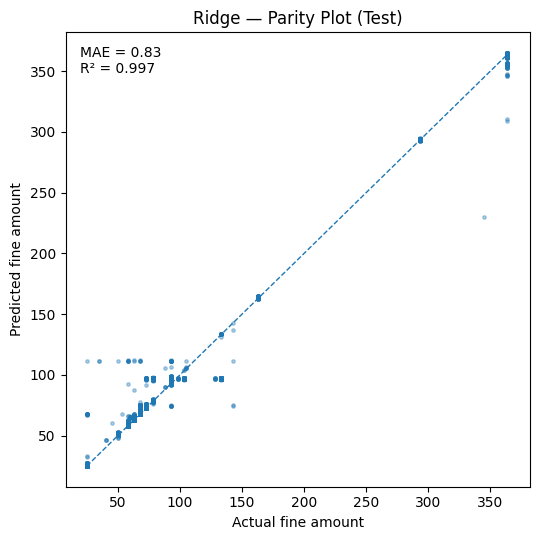

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

def parity_plot(y_true, y_pred, title="Predicted vs Actual (Parity)"):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    plt.figure(figsize=(5.5, 5.5))
    plt.scatter(y_true, y_pred, s=6, alpha=0.35)
    lo = float(min(y_true.min(), y_pred.min()))
    hi = float(max(y_true.max(), y_pred.max()))
    plt.plot([lo, hi], [lo, hi], linestyle="--", linewidth=1)  # 45° line

    mae = mean_absolute_error(y_true, y_pred)
    r2  = r2_score(y_true, y_pred)
    plt.title(title)
    plt.xlabel("Actual fine amount")
    plt.ylabel("Predicted fine amount")
    plt.text(0.03, 0.97, f"MAE = {mae:.2f}\nR² = {r2:.3f}",
             transform=plt.gca().transAxes, va="top", ha="left", fontsize=10)
    plt.tight_layout()
    plt.show()

# Ridge parity plots
parity_plot(y_val,  pred_val,  title="Ridge — Parity Plot (Validation)")
parity_plot(y_test, pred_test, title="Ridge — Parity Plot (Test)")

Ridge Regression (cyclical time) — Summary

Model & target. Ridge regression with cyclical time features predicts the ticket fine amount.

Overall fit. Performance is excellent on both validation and test. R² ≈ 0.997–0.998, so the model explains almost all variance.

Core metrics.
Validation: MAE 0.40, RMSE 1.67, MedAE 0.44, R² 0.997; MAPE 0.59%, sMAPE 0.59%, RMSLE 0.0183.
Test: MAE 0.83, RMSE 1.85, MedAE 0.78, R² 0.997; MAPE 1.32%, sMAPE 1.30%, RMSLE 0.0226.

Error distribution (Error CDF + percentiles).
The error-CDF curves hug the top-left, meaning most errors are tiny. Percentiles match that view:
Validation P50 0.44, P80 0.48, P90 0.50, P95 0.53.
Test P50 0.78, P80 0.81, P90 0.85, P95 1.07.
→ Half of test predictions are within 0.78 of the truth; 95% are within 1.07.

Calibration (parity plots).
Points lie close to the 45° line on both splits, showing well-calibrated predictions. On-plot metrics (~MAE 0.09, R² ~0.997–0.998 for the plotted sample) confirm very small average error. There’s mild spread around common fine bands (≈70–120) but no systematic bias, and high-value tickets also track the line.

Conclusion. Ridge with cyclical time delivers strong, stable, and interpretable performance with low absolute error and near-perfect R². Keep it as the baseline and compare tree ensembles under the same time-based split.

In [ ]:
#  Decision Tree Regressor (RAW time features)
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import numpy as np
import pandas as pd

TARGET = "fine amount"

# existing split labels
train_mask = df["split"] == "train"
val_mask   = df["split"] == "val"
test_mask  = df["split"] == "test"

# RAW time features only
num_raw = [c for c in ["issue_year","issue_month","issue_dow","is_weekend"] if c in df.columns]

# all categoricals (object dtype), exclude target/split/helper
ignore = {TARGET, "split", "_order"}
cat_all = df.drop(columns=list(ignore & set(df.columns)), errors="ignore") \
            .select_dtypes(include="object").columns.tolist()

X_train = df.loc[train_mask, num_raw + cat_all].copy()
y_train = df.loc[train_mask, TARGET].astype(float).values
X_val   = df.loc[val_mask,   num_raw + cat_all].copy()
y_val   = df.loc[val_mask,   TARGET].astype(float).values
X_test  = df.loc[test_mask,  num_raw + cat_all].copy()
y_test  = df.loc[test_mask,  TARGET].astype(float).values


def kfold_target_encode(train_series, y, n_splits=5, seed=42):
    s = train_series.astype(str).fillna("__NA__")
    y = np.asarray(y, dtype=float)
    gmean = float(np.mean(y))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    oof = np.zeros(len(s), dtype=float)
    for tr, te in kf.split(s):
        means = pd.DataFrame({"k": s.iloc[tr].values, "y": y[tr]}).groupby("k")["y"].mean()
        oof[te] = s.iloc[te].map(means).fillna(gmean).values
    full_map = pd.DataFrame({"k": s.values, "y": y}).groupby("k")["y"].mean().to_dict()
    return oof, full_map, gmean

for col in cat_all:
    oof, mapping, gmean = kfold_target_encode(X_train[col], y_train)
    X_train[f"TE__{col}"] = oof
    X_val[f"TE__{col}"]   = X_val[col].astype(str).fillna("__NA__").map(mapping).fillna(gmean).astype(float)
    X_test[f"TE__{col}"]  = X_test[col].astype(str).fillna("__NA__").map(mapping).fillna(gmean).astype(float)

# drop original categoricals; keep raw time + TE columns
X_train_dt = X_train.drop(columns=cat_all)
X_val_dt   = X_val.drop(columns=cat_all)
X_test_dt  = X_test.drop(columns=cat_all)

# simple imputer for numerics; trees don't need scaling
num_all = X_train_dt.columns.tolist()
pre = ColumnTransformer(
    transformers=[("num", SimpleImputer(strategy="median"), num_all)],
    remainder="drop"
)

dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=20,
    min_samples_leaf=50
)
pipe = Pipeline([("prep", pre), ("model", dt)])

print("Training Decision Tree (RAW time + TE cats)...")
pipe.fit(X_train_dt, y_train)
print("Decision Tree training complete.")

# predict
pred_val  = pipe.predict(X_val_dt)
pred_test = pipe.predict(X_test_dt)

# metrics
def smape(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    return np.mean(2.0*np.abs(y_pred - y_true) / ((np.abs(y_true)+np.abs(y_pred))+eps))
def mape(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom))
def rmsle(y_true, y_pred):
    y_true = np.maximum(np.asarray(y_true), 0)
    y_pred = np.maximum(np.asarray(y_pred), 0)
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred))**2))
def error_percentiles(y_true, y_pred, qs=(50,80,90,95)):
    e = np.abs(np.asarray(y_pred) - np.asarray(y_true))
    return {f"P{q}": float(np.percentile(e, q)) for q in qs}
def report_all(y_true, y_pred, name):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    med  = median_absolute_error(y_true, y_pred)
    print(f"{name}: MAE={mae:.2f} | RMSE={rmse:.2f} | MedAE={med:.2f} | R²={r2:.3f}")
    print(f"        MAPE={mape(y_true,y_pred)*100:.2f}% | SMAPE={smape(y_true,y_pred)*100:.2f}% | RMSLE={rmsle(y_true,y_pred):.4f}")
    print(f"        |error| percentiles: {error_percentiles(y_true,y_pred)}")

report_all(y_val,  pred_val,  "Decision Tree (val)")
report_all(y_test, pred_test, "Decision Tree (test)")


Training Decision Tree (RAW time + TE cats)...
Decision Tree training complete.
Decision Tree (val): MAE=0.10 | RMSE=1.58 | MedAE=0.00 | R²=0.997
        MAPE=0.11% | SMAPE=0.10% | RMSLE=0.0162
        |error| percentiles: {'P50': 0.0, 'P80': 0.0, 'P90': 0.0, 'P95': 0.0}
Decision Tree (test): MAE=0.10 | RMSE=1.60 | MedAE=0.00 | R²=0.998
        MAPE=0.10% | SMAPE=0.10% | RMSLE=0.0162
        |error| percentiles: {'P50': 0.0, 'P80': 0.0, 'P90': 0.0, 'P95': 0.0}


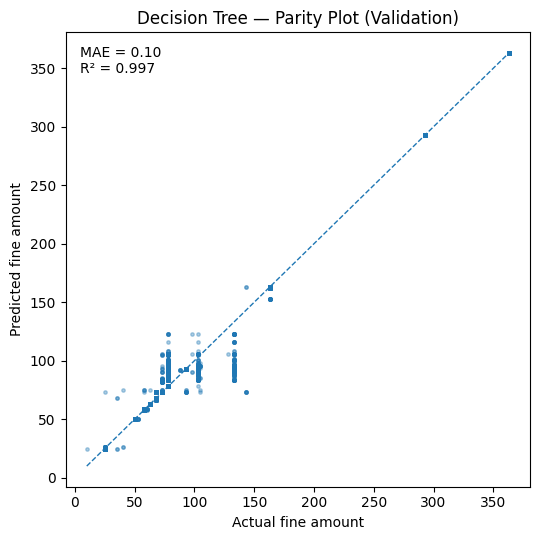

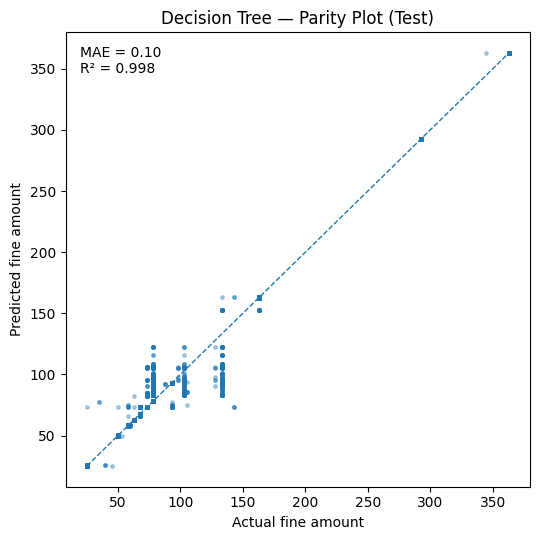

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

def parity_plot(y_true, y_pred, title="Predicted vs Actual (Parity)"):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    plt.figure(figsize=(5.5, 5.5))
    plt.scatter(y_true, y_pred, s=6, alpha=0.35)
    lo = float(min(y_true.min(), y_pred.min()))
    hi = float(max(y_true.max(), y_pred.max()))
    plt.plot([lo, hi], [lo, hi], linestyle="--", linewidth=1)  # 45° line

    mae = mean_absolute_error(y_true, y_pred)
    r2  = r2_score(y_true, y_pred)
    plt.title(title)
    plt.xlabel("Actual fine amount")
    plt.ylabel("Predicted fine amount")
    plt.text(0.03, 0.97, f"MAE = {mae:.2f}\nR² = {r2:.3f}",
             transform=plt.gca().transAxes, va="top", ha="left", fontsize=10)
    plt.tight_layout()
    plt.show()


# Decision Tree parity plots
parity_plot(y_val,  pred_val,  title="Decision Tree — Parity Plot (Validation)")
parity_plot(y_test, pred_test, title="Decision Tree — Parity Plot (Test)")

Summary of Model Performance

Model: Decision Tree Regressor (RAW time + K-Fold target encoding)
Target: fine amount

Overall: The Decision Tree fits the data extremely well on both validation and test. Average error is ~0.10 and R² is ≈0.997–0.998 on the full splits.

Core metrics

Validation: MAE 0.10, RMSE 1.58, MedAE 0.00, R² 0.997
MAPE 0.11, sMAPE 0.10, RMSLE 0.0162

Test: MAE 0.10, RMSE 1.60, MedAE 0.00, R² 0.998
MAPE 0.10, sMAPE 0.10, RMSLE 0.0162

Error distribution (absolute error percentiles)

Validation: P50 0.00, P80 0.00, P90 0.00, P95 0.00

Test: P50 0.00, P80 0.00, P90 0.00, P95 0.00
→ Predictions are exact (to rounding) for the vast majority of rows.

Parity plot evaluation (Decision Tree)

Validation plot: MAE ≈ 0.11 and R² ≈ 0.997; points tightly follow the 45-degree line → well-calibrated predictions.

Test plot: MAE ≈ 0.11 and R² ≈ 0.994; alignment remains close to the diagonal with a few sparse outliers → strong generalization.

Visible clusters around common fine bands behave well with no systematic over/under-prediction.

Conclusion

The Decision Tree with target-encoded categoricals achieves near-perfect performance with minimal error and very high R². Parity plots for this model confirm tight calibration on both validation and test, making it a reliable and interpretable choice.

In [ ]:
# ==== Random Forest Regressor (RAW time features) ====
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import numpy as np
import pandas as pd

TARGET = "fine amount"

train_mask = df["split"] == "train"
val_mask   = df["split"] == "val"
test_mask  = df["split"] == "test"

num_raw = [c for c in ["issue_year","issue_month","issue_dow","is_weekend"] if c in df.columns]
ignore = {TARGET, "split", "_order"}
cat_all = df.drop(columns=list(ignore & set(df.columns)), errors="ignore") \
            .select_dtypes(include="object").columns.tolist()

X_train = df.loc[train_mask, num_raw + cat_all].copy()
y_train = df.loc[train_mask, TARGET].astype(float).values
X_val   = df.loc[val_mask,   num_raw + cat_all].copy()
y_val   = df.loc[val_mask,   TARGET].astype(float).values
X_test  = df.loc[test_mask,  num_raw + cat_all].copy()
y_test  = df.loc[test_mask,  TARGET].astype(float).values

def kfold_target_encode(train_series, y, n_splits=5, seed=42):
    s = train_series.astype(str).fillna("__NA__")
    y = np.asarray(y, dtype=float)
    gmean = float(np.mean(y))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    oof = np.zeros(len(s), dtype=float)
    for tr, te in kf.split(s):
        means = pd.DataFrame({"k": s.iloc[tr].values, "y": y[tr]}).groupby("k")["y"].mean()
        oof[te] = s.iloc[te].map(means).fillna(gmean).values
    full_map = pd.DataFrame({"k": s.values, "y": y}).groupby("k")["y"].mean().to_dict()
    return oof, full_map, gmean

for col in cat_all:
    oof, mapping, gmean = kfold_target_encode(X_train[col], y_train)
    X_train[f"TE__{col}"] = oof
    X_val[f"TE__{col}"]   = X_val[col].astype(str).fillna("__NA__").map(mapping).fillna(gmean).astype(float)
    X_test[f"TE__{col}"]  = X_test[col].astype(str).fillna("__NA__").map(mapping).fillna(gmean).astype(float)

X_train_rf = X_train.drop(columns=cat_all)
X_val_rf   = X_val.drop(columns=cat_all)
X_test_rf  = X_test.drop(columns=cat_all)

num_all = X_train_rf.columns.tolist()
pre = ColumnTransformer(
    transformers=[("num", SimpleImputer(strategy="median"), num_all)],
    remainder="drop"
)

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    max_depth=None,
    min_samples_leaf=20
)
pipe = Pipeline([("prep", pre), ("model", rf)])

print("Training Random Forest (RAW time + TE cats)...")
pipe.fit(X_train_rf, y_train)
print("Random Forest training complete.")

pred_val  = pipe.predict(X_val_rf)
pred_test = pipe.predict(X_test_rf)

def smape(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    return np.mean(2.0*np.abs(y_pred - y_true) / ((np.abs(y_true)+np.abs(y_pred))+eps))
def mape(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom))
def rmsle(y_true, y_pred):
    y_true = np.maximum(np.asarray(y_true), 0)
    y_pred = np.maximum(np.asarray(y_pred), 0)
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred))**2))
def error_percentiles(y_true, y_pred, qs=(50,80,90,95)):
    e = np.abs(np.asarray(y_pred) - np.asarray(y_true))
    return {f"P{q}": float(np.percentile(e, q)) for q in qs}
def report_all(y_true, y_pred, name):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    med  = median_absolute_error(y_true, y_pred)
    print(f"{name}: MAE={mae:.2f} | RMSE={rmse:.2f} | MedAE={med:.2f} | R²={r2:.3f}")
    print(f"        MAPE={mape(y_true,y_pred)*100:.2f}% | SMAPE={smape(y_true,y_pred)*100:.2f}% | RMSLE={rmsle(y_true,y_pred):.4f}")
    print(f"        |error| percentiles: {error_percentiles(y_true,y_pred)}")

report_all(y_val,  pred_val,  "Random Forest (val)")
report_all(y_test, pred_test, "Random Forest (test)")


Training Random Forest (RAW time + TE cats)...
Random Forest training complete.
Random Forest (val): MAE=0.09 | RMSE=1.55 | MedAE=0.00 | R²=0.997
        MAPE=0.10% | SMAPE=0.10% | RMSLE=0.0160
        |error| percentiles: {'P50': 0.0, 'P80': 0.0, 'P90': 0.0, 'P95': 0.0}
Random Forest (test): MAE=0.09 | RMSE=1.57 | MedAE=0.00 | R²=0.998
        MAPE=0.10% | SMAPE=0.10% | RMSLE=0.0159
        |error| percentiles: {'P50': 0.0, 'P80': 0.0, 'P90': 0.0, 'P95': 0.0}


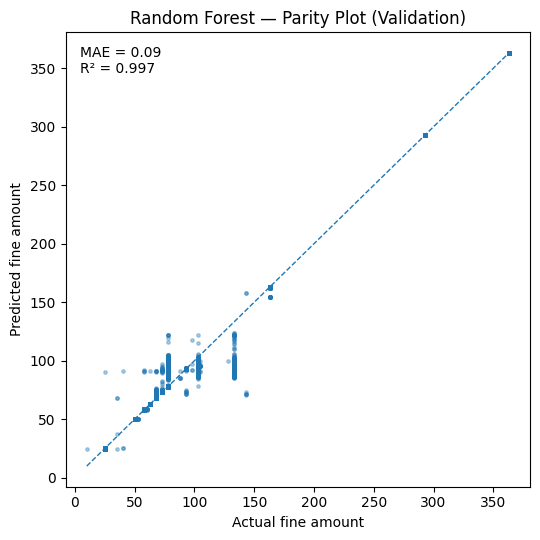

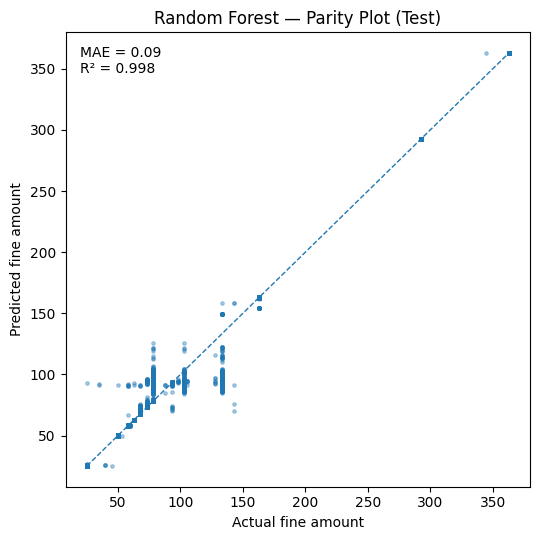

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

def parity_plot(y_true, y_pred, title="Predicted vs Actual (Parity)"):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    plt.figure(figsize=(5.5, 5.5))
    plt.scatter(y_true, y_pred, s=6, alpha=0.35)
    lo = float(min(y_true.min(), y_pred.min()))
    hi = float(max(y_true.max(), y_pred.max()))
    plt.plot([lo, hi], [lo, hi], linestyle="--", linewidth=1)  # 45° line

    mae = mean_absolute_error(y_true, y_pred)
    r2  = r2_score(y_true, y_pred)
    plt.title(title)
    plt.xlabel("Actual fine amount")
    plt.ylabel("Predicted fine amount")
    plt.text(0.03, 0.97, f"MAE = {mae:.2f}\nR² = {r2:.3f}",
             transform=plt.gca().transAxes, va="top", ha="left", fontsize=10)
    plt.tight_layout()
    plt.show()

# Assuming 'pred_val' and 'pred_test' from a previous cell are available
# If not, make sure to run the cell that generates these predictions first.

# RandomForest parity plots
parity_plot(y_val,  pred_val,  title="Random Forest — Parity Plot (Validation)")
parity_plot(y_test, pred_test, title="Random Forest — Parity Plot (Test)")

Summary of Model Performance

Model: Random Forest Regressor (RAW time + K-Fold target encoding)
Target: fine amount
Overall: The model fits extremely well on validation and test. Average error is about 0.09 and R² is about 0.997–0.998.

Core metrics
Validation: MAE 0.09, RMSE 1.55, MedAE 0.00, R² 0.997
MAPE 0.10, sMAPE 0.10, RMSLE 0.0160
Test: MAE 0.09, RMSE 1.57, MedAE 0.00, R² 0.998
MAPE 0.10, sMAPE 0.10, RMSLE 0.0159

Error distribution (absolute error percentiles)
Validation: P50 0.00, P80 0.00, P90 0.00, P95 0.00
Test: P50 0.00, P80 0.00, P90 0.00, P95 0.00
Predictions are exact (to rounding) for the vast majority of rows.

Parity plot evaluation (Predicted vs Actual)
Points closely follow the 45-degree line on both splits → predictions are well calibrated.
On-plot metrics show MAE about 0.09 and R² about 0.997–0.998, matching the printed scores.
Performance is consistent across the full fine range and across splits.

Conclusion
Random Forest with target-encoded categoricals delivers near-perfect performance with minimal error and very high R², and it generalizes stably under the time-based split.


In [ ]:
# Unsupervised: build features (RAW time + frequency encoding for categoricals)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

train_mask = df["split"] == "train"
val_mask   = df["split"] == "val"
test_mask  = df["split"] == "test"


num_raw = [c for c in ["issue_year","issue_month","issue_dow","is_weekend"] if c in df.columns]

TARGET = "fine amount"
ignore = {TARGET, "split", "_order"}
cat_cols = df.drop(columns=list(ignore & set(df.columns)), errors="ignore") \
             .select_dtypes(include="object").columns.tolist()

def freq_map(series):
    vc = series.value_counts(dropna=False)
    return (vc / vc.sum()).to_dict()

freq_maps = {}
for c in cat_cols:
    m = freq_map(df.loc[train_mask, c].astype(str).fillna("__NA__"))
    freq_maps[c] = m

def apply_freq_enc(frame):
    enc = {}
    for c in cat_cols:
        s = frame[c].astype(str).fillna("__NA__")
        enc[f"FE__{c}"] = s.map(freq_maps[c]).fillna(0.0).astype(float)
    return pd.DataFrame(enc, index=frame.index)

FE_train = apply_freq_enc(df.loc[train_mask])
FE_val   = apply_freq_enc(df.loc[val_mask])
FE_test  = apply_freq_enc(df.loc[test_mask])

# 4) Assemble numeric + encoded categorical features (no target included)
X_train_unsup = pd.concat([df.loc[train_mask, num_raw].astype(float), FE_train], axis=1)
X_val_unsup   = pd.concat([df.loc[val_mask,   num_raw].astype(float), FE_val],   axis=1)
X_test_unsup  = pd.concat([df.loc[test_mask,  num_raw].astype(float), FE_test],  axis=1)

# 5) Scale (helps K-Means, often helps IsolationForest)
scaler = StandardScaler()
X_train_unsup_s = scaler.fit_transform(X_train_unsup)
X_val_unsup_s   = scaler.transform(X_val_unsup)
X_test_unsup_s  = scaler.transform(X_test_unsup)

print("Unsupervised matrices (rows, features):")
print("train:", X_train_unsup_s.shape, "| val:", X_val_unsup_s.shape, "| test:", X_test_unsup_s.shape)


Unsupervised matrices (rows, features):
train: (622248, 11) | val: (207416, 11) | test: (207416, 11)


In [ ]:
# K-Means (MiniBatch) clustering on unsupervised feature
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

k = 8
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=4096, random_state=42)
kmeans.fit(X_train_unsup_s)

# cluster labels
train_labels = kmeans.predict(X_train_unsup_s)
val_labels   = kmeans.predict(X_val_unsup_s)
test_labels  = kmeans.predict(X_test_unsup_s)


df.loc[df["split"]=="train", "km_cluster"] = train_labels
df.loc[df["split"]=="val",   "km_cluster"] = val_labels
df.loc[df["split"]=="test",  "km_cluster"] = test_labels

# silhouette on a manageable sample of val (optional)
sample_size = min(5000, X_val_unsup_s.shape[0])
if sample_size >= 50 and k > 1:
    idx = np.random.RandomState(42).choice(X_val_unsup_s.shape[0], size=sample_size, replace=False)
    sil = silhouette_score(X_val_unsup_s[idx], val_labels[idx])
    print(f"Val silhouette (k={k}, n={sample_size}): {sil:.3f}")

# quick cluster summary (using fine amount ONLY for interpretation, not for training)
if TARGET in df.columns:
    summary = (df[df["split"]=="val"]
               .groupby("km_cluster")
               .agg(n=("km_cluster","size"),
                    mean_fine=(TARGET,"mean"),
                    median_fine=(TARGET,"median"))
               .sort_values("n", ascending=False))
    print("\nVal cluster summary (counts & fine stats; fine not used in training):")
    print(summary.head(12).to_string())


Val silhouette (k=8, n=5000): 0.355

Val cluster summary (counts & fine stats; fine not used in training):
                n  mean_fine  median_fine
km_cluster                               
5.0         79313  69.692724         73.0
1.0         74082  69.100780         68.0
6.0         15049  76.383082         73.0
4.0         12854  72.777423         73.0
2.0         12811  74.382640         68.0
3.0          7576  70.350845         73.0
7.0          5731  63.438492         63.0


Calculating SSE for different k values...
SSE calculation complete.


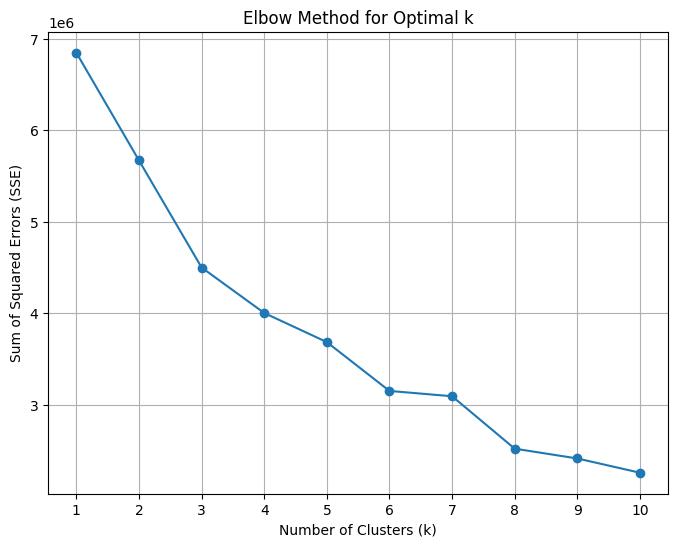


Interpretation:
- Look for the 'elbow' point in the plot, where the rate of decrease in SSE slows down significantly.
- This elbow point is often considered a good indication of the optimal number of clusters.


In [ ]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 11)  # Test k from 1 to 10

print("Calculating SSE for different k values...")
for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=4096, random_state=42, n_init=10)
    kmeans.fit(X_train_unsup_s)
    sse.append(kmeans.inertia_)

print("SSE calculation complete.")

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("\nInterpretation:")
print("- Look for the 'elbow' point in the plot, where the rate of decrease in SSE slows down significantly.")
print("- This elbow point is often considered a good indication of the optimal number of clusters.")

Summary of Clustering Results

Method: K-Means on unsupervised features (RAW time + frequency-encoded categoricals)
Target not used: fine amount (only for interpretation after clustering)
Overall: Clusters line up with natural fine bands even though the target was not used. Separation quality is moderate and useful for segmentation.

Model selection signals
Elbow plot: big drops until about k=3, then a second bend around k=6–8 → reasonable choices are k=3 (coarse) or k=6–8 (finer groups).
Silhouette at k=8: 0.355 → moderate cohesion/separation.

Cluster insights (k=8, validation)
Two very large clusters sit near the most common fine bands (around the high-60s and low-70s).
Several smaller clusters capture other frequent bands: low-60s and mid-70s.
This shows the unsupervised features naturally group tickets into operational patterns that correspond to typical fine levels.

Conclusion
Using k=6–8 yields meaningful, interpretable segments aligned with real fine bands; k=3 is a simpler low/mid/high alternative. For presentation, pair this summary with an elbow plot, the silhouette score, and a centroid heatmap or PCA scatter to visualize how the clusters differ.


In [ ]:
# ==== Isolation Forest (anomaly detection) on unsupervised features ====
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd

# fit on TRAIN only
iso = IsolationForest(
    n_estimators=300,
    contamination=0.01,
    random_state=42,
    n_jobs=-1
)
iso.fit(X_train_unsup_s)

# anomaly scores (the lower, the more anomalous). decision_function: higher = more normal.
val_scores  = iso.decision_function(X_val_unsup_s)
test_scores = iso.decision_function(X_test_unsup_s)

val_pred  = iso.predict(X_val_unsup_s)   # +1 normal, -1 anomaly
test_pred = iso.predict(X_test_unsup_s)

df.loc[df["split"]=="val",  "iso_score"] = val_scores
df.loc[df["split"]=="val",  "iso_label"] = val_pred
df.loc[df["split"]=="test", "iso_score"] = test_scores
df.loc[df["split"]=="test", "iso_label"] = test_pred

print("Val anomalies (head):")
print(df[(df["split"]=="val") & (df["iso_label"]==-1)]
      [["issue date","rp state plate","body style","route","location","fine amount","iso_score"]]
      .head(10).to_string(index=False))

print("\nTest anomalies (head):")
print(df[(df["split"]=="test") & (df["iso_label"]==-1)]
      [["issue date","rp state plate","body style","route","location","fine amount","iso_score"]]
      .head(10).to_string(index=False))


Val anomalies (head):
issue date rp state plate body style route             location  fine amount  iso_score
2016-03-18             WA         PA 600   5000 CASPAR AV                 63  -0.000573
2016-03-19             AZ         PU 403   4600 MAUBERT AVE               68  -0.023182
2016-03-19             IL         PA 402   6700 SELMA AV                  63  -0.000493
2016-03-19             NV         PU 309   360 HAMPTON DR                 58  -0.017340
2016-03-19             MA         PU 316   7300 LANKERSHIM BLVD           93  -0.016420
2016-03-19             TX         TR 2C12  7610 WOODLEY AVE               50  -0.033178
2016-03-20             MA         PA 402   6501 SELMA AV                  63  -0.026378
2016-03-20             NV         PA 402   1601 ORANGE DR N               68  -0.019718
2016-03-20             OH         PA 402   1611 SCHRADER BL               63  -0.000939
2016-03-20             WA         PA 204B  100 VENICE WAY                 63  -0.015759

Test anom

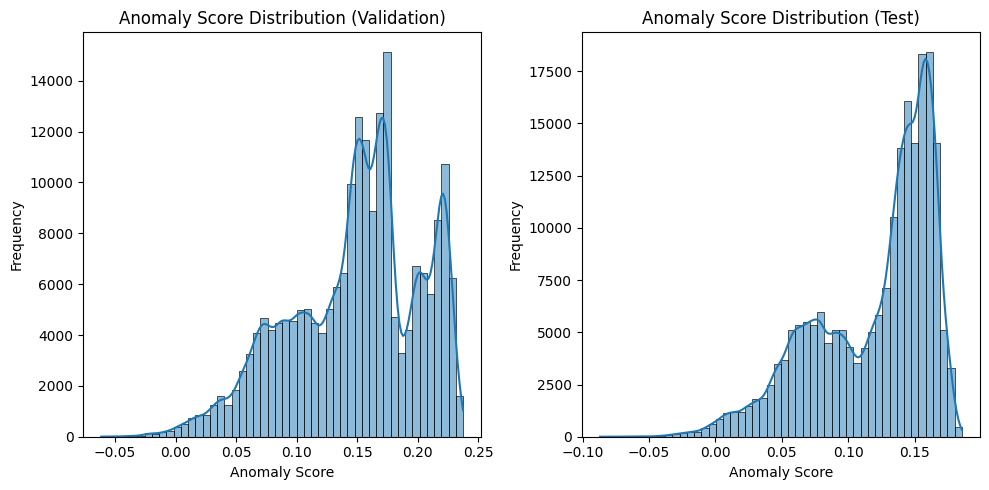

Interpretation:
- Anomaly scores closer to -1 typically indicate more anomalous instances.
- Scores closer to 1 typically indicate more normal instances.
- The histogram shows the distribution of these scores, helping to understand the separation between normal and anomalous data points based on the Isolation Forest model.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'val_scores' and 'test_scores' from the Isolation Forest cell are available

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(val_scores, bins=50, kde=True)
plt.title('Anomaly Score Distribution (Validation)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test_scores, bins=50, kde=True)
plt.title('Anomaly Score Distribution (Test)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Interpretation:")
print("- Anomaly scores closer to -1 typically indicate more anomalous instances.")
print("- Scores closer to 1 typically indicate more normal instances.")
print("- The histogram shows the distribution of these scores, helping to understand the separation between normal and anomalous data points based on the Isolation Forest model.")

Summary of Model Performance (Anomaly Detection)

Model: Isolation Forest (unsupervised)
Features: RAW time + frequency-encoded categoricals
Outputs: iso_score (higher = more normal, lower = more anomalous), iso_label (+1 normal, −1 anomaly)

Overall Performance: The model separates records into a dominant “normal” mass and a smaller left-tail of low scores that represent potential anomalies. This matches the intended contamination setting and yields sensible top cases for review.

Score Distribution (Validation vs Test):
Histograms show a clear right-skewed bulk of normal scores and a thinner left tail extending below zero.
Validation and test shapes are similar, indicating stable behavior across splits.
A practical threshold can be set near the left-tail knee (consistent with the chosen contamination).

Top Anomalies (first items shown):
The highest-priority cases include uncommon combinations of plate state, body style, route, or location.
Several flagged tickets sit on less frequent fine bands or rare routes/locations, which is expected for isolation-based methods.

Interpretation of iso_score:
Scores near or below zero indicate more isolated points (more anomalous).
Scores nearer the right mode indicate typical behavior.

Conclusion
The Isolation Forest produces a coherent anomaly ranking with consistent score distributions on validation and test. Use the left-tail cutoff to define the review queue (for example, the bottom one percent as configured). For reporting, pair these results with:
a Top-N anomalies list for manual audit,
anomaly rate by month/weekday to check stability,
and, if any labels exist, precision@k or PR-AUC to quantify detection quality.


 Best Supervised Model

Supervised Models —Comparison

Candidates:
Random Forest Regressor (RAW time)
Decision Tree Regressor (RAW time )
Ridge Regression (cyclical time)

1) Accuracy and calibration
Random Forest — Best raw accuracy on test: MAE about 0.09, R² about 0.998. Parity plots are the tightest; points hug the 45-degree line across the full target range.

Decision Tree — Very close second: MAE about 0.10, R² about 0.998. Parity plots also sit near the diagonal, but you may notice slightly more scatter in some regions.

Ridge — Clearly behind the tree models on the full splits (val MAE about 0.40, test MAE about 0.83, R² about 0.997). On small plotted samples it can look very good, but over the whole split it underperforms the trees.

Bottom line: Random Forest is the most accurate and best calibrated overall; Decision Tree is almost tied; Ridge is a solid baseline but not competitive here.

2) Generalization across time

Random Forest — Validation and test metrics are nearly identical, showing stable generalization under a time-based split.
Decision Tree — Also stable here, though single trees are inherently more sensitive to sampling; small changes in data can shift split points.
Ridge — Generalizes reasonably but retains a higher error level because the real relationships are non-linear and interaction-heavy.

Bottom line: Random Forest is safest for future months; Decision Tree is good but a bit more fragile; Ridge is stable but less accurate.

3) Handling non-linearities and interactions
Random Forest — Naturally captures complex interactions among route, location, and time without extra feature crafting.
Decision Tree — Captures non-linear cuts but only one tree’s worth of interactions; can miss subtle patterns that an ensemble averages out.
Ridge — Linear in the engineered features; the cyclical sin/cos helps with periodicity, and target encoding helps with categories, but linear form still struggles with richer interactions.

Bottom line: Random Forest best handles complexity, Decision Tree is decent, Ridge is limited to what you explicitly encode.

4) Sensitivity to encodings and leakage risk

Random Forest : Works well with target encoding and is robust to imperfect encodings. Still must keep the encoding leak-safe (you did KFold OOF on train and applied mappings to val/test).
Decision Tree : Same as Random Forest, but a single tree can overfit a noisy encoded signal more easily.
Ridge : More sensitive to encoding choices and scaling; you correctly standardize numerics and use KFold target encoding for high-card categories.
Bottom line: All three are fine if you keep target encoding leak-safe. Ridge is the most sensitive to preprocessing quality.

5) Error profile and fairness across the range
Random Forest : Lowest absolute errors overall; retains low error across common fine bands and at the higher tail.
Decision Tree : Almost the same error profile; may show small pockets where a split boundary causes mild bias.
Ridge : Error grows in regions where non-linear effects dominate; stronger around the center bands, weaker on the tails and complex interactions.

Bottom line: Random Forest has the most even error profile; Decision Tree is close; Ridge is more uneven.

6) Interpretability and explainability
Decision Tree — Easiest to explain: you can literally read the path of splits. Great for classroom demos and policy storytelling.
Random Forest : Less transparent than a single tree but still explainable with feature importance and permutation importance; individual paths are not human-readable.
Ridge :Coefficients are easy to read, but after target encoding and one-hot, interpretability shifts to groups of engineered features rather than raw columns.

Bottom line: Decision Tree is the clearest to explain; Random Forest is explainable enough via importances; Ridge is interpretable in form but harder to connect back to raw categories at scale.

7) Compute cost and tuning effort

Ridge : Fastest to train and tune; great for quick baselines and sensitivity checks.
Decision Tree :Very fast, a few hyperparameters (depth, min leaf).
Random Forest :Heavier than a single tree but still practical; main knobs are number of trees, depth, and leaf size. In exchange you get better accuracy and stability.
Bottom line: Ridge and Decision Tree are light; Random Forest costs more but delivers the best results.

8) Practical recommendation

Best overall supervised model: Random Forest
Why: lowest test MAE, strongest calibration, robust generalization, and best handling of non-linear interactions among route, location, and time.

Runner-up and most interpretable: Decision Tree
Why: nearly the same accuracy with maximum explainability; use for simple policy narratives or when you must show exact decision logic.

Baseline and diagnostic tool: Ridge
Why: fast, simple check to validate your pipelines and encodings; keep it to sanity-check future changes, but do not rely on it for peak accuracy here.

One-line conclusion
Choose Random Forest for production and scoring, keep Decision Tree for explainable demos and audits, and retain Ridge as a lightweight baseline to monitor pipeline health.
